#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import eda_utils

from importlib import reload

In [2]:
plt.style.use('./styles.txt')

#### Index

# Introduction

*TODO*

## Data Loading

In [102]:
reload(utils)

<module 'utils' from '/Users/ejb/Documents/Brainstation/Capstone-Project/utils.py'>

In [103]:
df = utils.LoadDf()

# Check output
df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0       1992              1       0.10               A  43.325000 -101.018500   
1       1992              1       1.00               B  33.058333  -79.979167   
2       1992              2       0.25               A  40.775000  -74.854160   
3       1992              3       1.91               B  31.018500  -83.297300   
4       1992              3       2.00               B  30.728900  -87.238100   

  STATE  avg_tempmax   avg_temp  avg_humidity  avg_precip   avg_dew  \
0    SD     5.257143  -2.928571     81.142857    0.000000 -6.071429   
1    SC    13.700000   9.885714     81.428571    4.185714  6.671429   
2    NJ     6.385714   1.585714     67.185714    1.394286 -4.242857   
3    GA    14.457143  11.828571     78.957143    4.685714  8.128571   
4    FL    14.428571  10.985714     79.971429    0.188571  7.500000   

   avg_windspeed  avg_winddir  avg_pressure           ch4           co2  \
0      18.371429   223.500000   1021.671429  4.613353e-11  3.672947e-09   
1      23.514286   112.142857   1023.357143  1.795242e-11  8.400253e-07   
2      18.157143   133.342857   1027.400000  3.996876e-11  2.849724e-08   
3      19.200000   160.728571   1019.242857  4.614540e-11  7.060710e-09   
4      17.000000   216.628571   1019.671429  9.516179e-12  3.579336e-09   

            n2o  tempmax_variance  tempmax_delta  temp_variance  temp_delta  \
0  3.926278e-12          6.265306           -2.3       3.030612         1.3   
1  1.743553e-11          4.182857            4.7       0.752653         0.5   
2  4.053962e-12          3.741224           -0.1       6.858367         1.6   
3  2.618501e-12          4.645306           -0.3       4.124898        -0.9   
4  1.213336e-12          2.844898           -2.5       5.009796        -4.4   

   humidity_variance  humidity_delta  precip_variance  precip_delta  \
0          24.548163            11.5         0.000000          0.00   
1         111.222041            -2.7        55.589796         -4.40   
2          90.024082            11.4         9.546510          0.00   
3          47.791020           -16.5        59.321224         -9.70   
4          41.290612           -17.8         0.213355         -1.32   

   dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0      5.399184        3.5           47.062041             -1.8   
1      7.196327        0.1            5.575510              2.0   
2     19.731020        4.0           34.516735            -10.6   
3      9.142041       -4.1           11.228571              0.2   
4     10.262857       -7.9           27.382857              6.7   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       1889.074286          -48.6          28.913469            -4.3  
1      15648.559592          -14.9          19.071020             2.4  
2      16492.948163         -254.6          75.711429            -0.9  
3      16679.204898          223.6          21.585306            -8.4  
4      19587.093469          -24.8          13.107755            -2.7

In [104]:
eda_utils.BasicEda(df, 'Wildfires')

WILDFIRES
---------

Rows: 29734    Columns: 34

Total null rows: 0
Percentage null rows:  0.000%

Total duplicate rows: 131
Percentage duplicate rows:  0.004%

FIRE_YEAR               int64
DISCOVERY_DOY           int64
FIRE_SIZE             float64
FIRE_SIZE_CLASS        object
LATITUDE              float64
LONGITUDE             float64
STATE                  object
avg_tempmax           float64
avg_temp              float64
avg_humidity          float64
avg_precip            float64
avg_dew               float64
avg_windspeed         float64
avg_winddir           float64
avg_pressure          float64
ch4                   float64
co2                   float64
n2o                   float64
tempmax_variance      float64
tempmax_delta         float64
temp_variance         float64
temp_delta            float64
humidity_variance     float64
humidity_delta        float64
precip_variance       float64
precip_delta          float64
dew_variance          float64
dew_delta             float64

## Preprocessing

### Processing Numerical Columns

In [105]:
numeric_df = df.select_dtypes('number')
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
1       1992              1       1.00  33.058333  -79.979167    13.700000   
2       1992              2       0.25  40.775000  -74.854160     6.385714   
3       1992              3       1.91  31.018500  -83.297300    14.457143   
4       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0  -2.928571     81.142857    0.000000 -6.071429      18.371429   223.500000   
1   9.885714     81.428571    4.185714  6.671429      23.514286   112.142857   
2   1.585714     67.185714    1.394286 -4.242857      18.157143   133.342857   
3  11.828571     78.957143    4.685714  8.128571      19.200000   160.728571   
4  10.985714     79.971429    0.188571  7.500000      17.000000   216.628571   

   avg_pressure           ch4           co2           n2o  tempmax_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12          6.265306   
1   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11          4.182857   
2   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12          3.741224   
3   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12          4.645306   
4   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12          2.844898   

   tempmax_delta  temp_variance  temp_delta  humidity_variance  \
0           -2.3       3.030612         1.3          24.548163   
1            4.7       0.752653         0.5         111.222041   
2           -0.1       6.858367         1.6          90.024082   
3           -0.3       4.124898        -0.9          47.791020   
4           -2.5       5.009796        -4.4          41.290612   

   humidity_delta  precip_variance  precip_delta  dew_variance  dew_delta  \
0            11.5         0.000000          0.00      5.399184        3.5   
1            -2.7        55.589796         -4.40      7.196327        0.1   
2            11.4         9.546510          0.00     19.731020        4.0   
3           -16.5        59.321224         -9.70      9.142041       -4.1   
4           -17.8         0.213355         -1.32     10.262857       -7.9   

   windspeed_variance  windspeed_delta  winddir_variance  winddir_delta  \
0           47.062041             -1.8       1889.074286          -48.6   
1            5.575510              2.0      15648.559592          -14.9   
2           34.516735            -10.6      16492.948163         -254.6   
3           11.228571              0.2      16679.204898          223.6   
4           27.382857              6.7      19587.093469          -24.8   

   pressure_variance  pressure_delta  
0          28.913469            -4.3  
1          19.071020             2.4  
2          75.711429            -0.9  
3          21.585306            -8.4  
4          13.107755            -2.7

In [106]:
utils.HistogramSubplots(numeric_df.drop('FIRE_SIZE', axis=1))

As we can see, certain distributions are not normally distributed. The variance calculations, for example, are all skewed to the right. We can therefore transform these columns using a Box-Cox transformation. To apply a Box-Cox transformation however, the variance can not equal 0, meaning that precipitation variance can not be transformed. As we have done this process before, we will use a function that automates this process for us.

In [107]:
df, boxcox_cols = utils.BasicNumericPreprocessing(df)

In [108]:
df.head(2)

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0       1992              1        0.1               A  43.325000 -101.018500   
1       1992              1        1.0               B  33.058333  -79.979167   

  STATE  avg_tempmax  avg_temp  avg_humidity  avg_precip   avg_dew  \
0    SD     5.257143 -2.928571     81.142857    0.000000 -6.071429   
1    SC    13.700000  9.885714     81.428571    4.185714  6.671429   

   avg_windspeed  avg_winddir  avg_pressure           ch4           co2  \
0      18.371429   223.500000   1021.671429  4.613353e-11  3.672947e-09   
1      23.514286   112.142857   1023.357143  1.795242e-11  8.400253e-07   

            n2o  tempmax_variance  tempmax_delta  temp_variance  temp_delta  \
0  3.926278e-12          2.208106           -2.3       1.222298         1.3   
1  1.743553e-11          1.651649            4.7      -0.277277         0.5   

   humidity_variance  humidity_delta  precip_variance  precip_delta  \
0           4.438154            11.5         0.000000           0.0   
1           7.707836            -2.7        55.589796          -4.4   

   dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0      1.969620        3.5            5.226522             -1.8   
1      2.368858        0.1            1.962302              2.0   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0         63.723124          -48.6           4.150127            -4.3  
1        168.249044          -14.9           3.540947             2.4

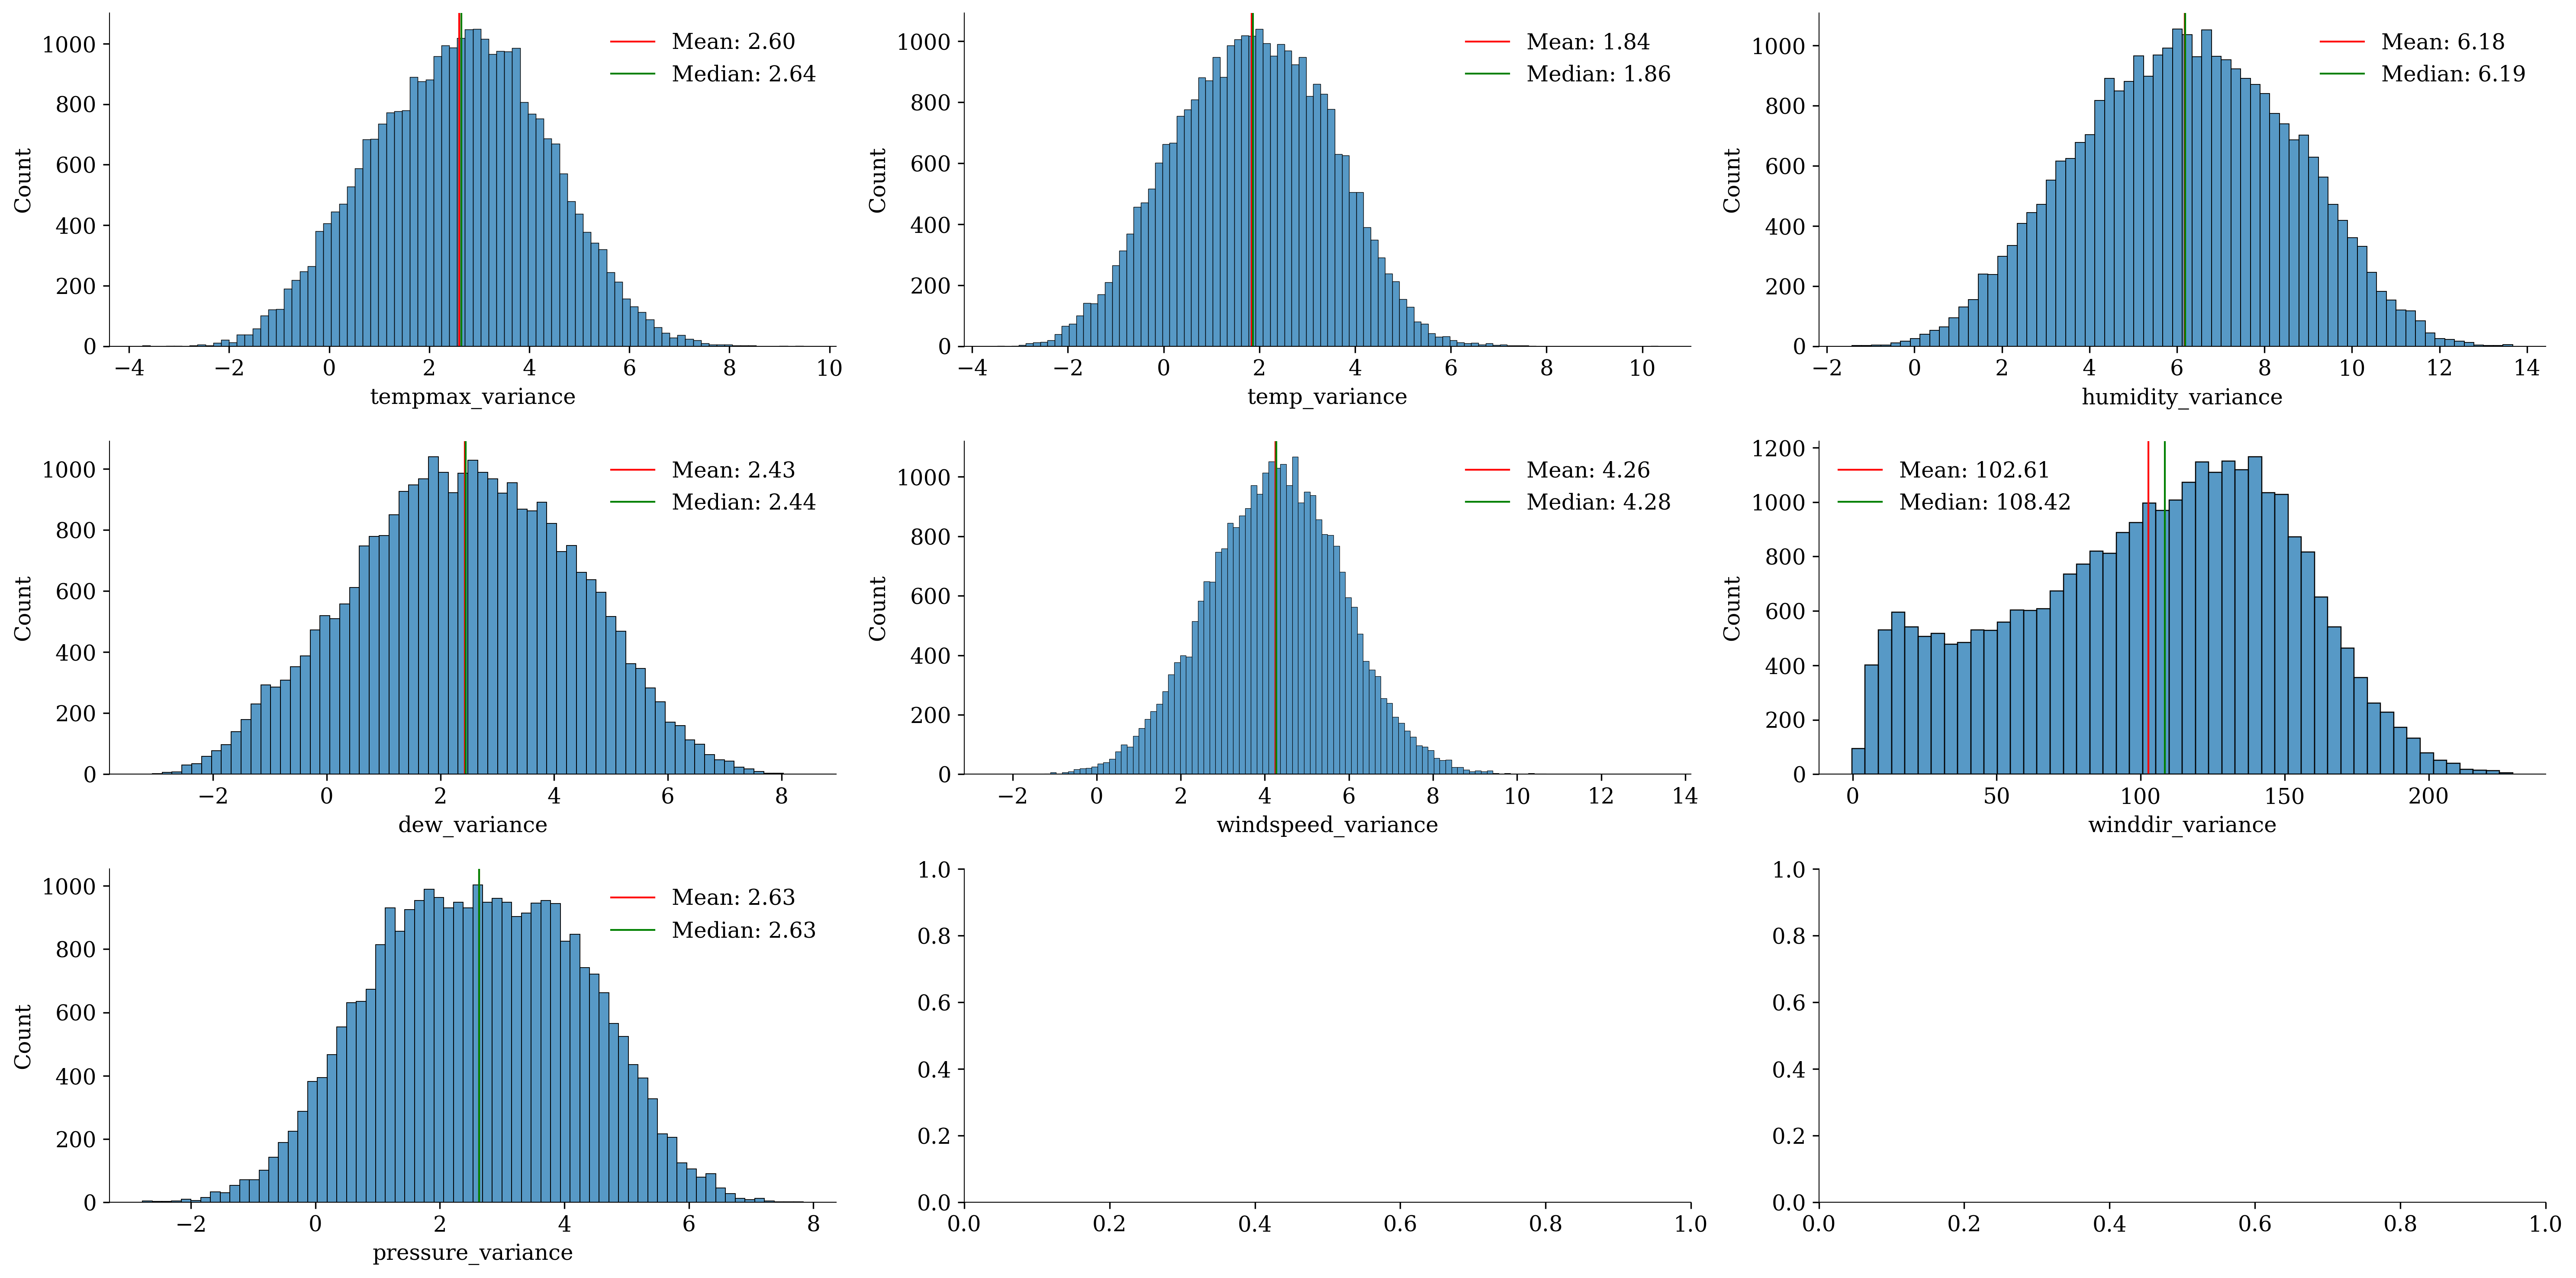

In [109]:
# Check that the transformations were correctly executed
utils.HistogramSubplots(df[boxcox_cols], figsize=(20,10))

After the transformations, we see that the columns now resemble a normal distribution. The remaining columns will not be transformed, but instead will be scaled using different scalers.

Now that we have processed the numeric columns, we will process the categorical.

### Preprocessing Categorical Data

In [110]:
df = utils.BasicPreprocessing(df)

df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0       1992              1       0.10               A  43.325000 -101.018500   
1       1992              1       1.00               B  33.058333  -79.979167   
2       1992              2       0.25               A  40.775000  -74.854160   
3       1992              3       1.91               B  31.018500  -83.297300   
4       1992              3       2.00               B  30.728900  -87.238100   

   avg_tempmax   avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  \
0     5.257143  -2.928571     81.142857    0.000000 -6.071429      18.371429   
1    13.700000   9.885714     81.428571    4.185714  6.671429      23.514286   
2     6.385714   1.585714     67.185714    1.394286 -4.242857      18.157143   
3    14.457143  11.828571     78.957143    4.685714  8.128571      19.200000   
4    14.428571  10.985714     79.971429    0.188571  7.500000      17.000000   

   avg_winddir  avg_pressure           ch4           co2           n2o  \
0   223.500000   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12   
1   112.142857   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11   
2   133.342857   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12   
3   160.728571   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12   
4   216.628571   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12   

   tempmax_variance  tempmax_delta  temp_variance  temp_delta  \
0          2.208106           -2.3       1.222298         1.3   
1          1.651649            4.7      -0.277277         0.5   
2          1.505574           -0.1       2.285130         1.6   
3          1.791868           -0.3       1.605936        -0.9   
4          1.160271           -2.5       1.858536        -4.4   

   humidity_variance  humidity_delta  precip_variance  precip_delta  \
0           4.438154            11.5         0.000000          0.00   
1           7.707836            -2.7        55.589796         -4.40   
2           7.190512            11.4         9.546510          0.00   
3           5.762483           -16.5        59.321224         -9.70   
4           5.456998           -17.8         0.213355         -1.32   

   dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0      1.969620        3.5            5.226522             -1.8   
1      2.368858        0.1            1.962302              2.0   
2      3.945401        4.0            4.684290            -10.6   
3      2.717487       -4.1            2.919906              0.2   
4      2.891411       -7.9            4.295608              6.7   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  \
0         63.723124          -48.6           4.150127            -4.3   
1        168.249044          -14.9           3.540947             2.4   
2        172.321219         -254.6           5.682283            -0.9   
3        173.203903          223.6           3.719052            -8.4   
4        186.336011          -24.8           3.017642            -2.7   

   state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         1         0         0         0   
4         0         0         1         0         0         0         0   

   state_IL  state_IN  state

## Modelling

As we saw from the initial model that we ran in a previous notebook, the accuracy of the model was severely affected by the distribution of the fires. As a classification model, the baseline model that we created initially was very poor at distinguishing between the different fire sizes, opting to classify most fires as coming from `FIRE_SIZE_CLASS` B, as this was the most common. We therefore want to begin this modelling process by creating an even distribution in our samples. We can do this in a number of ways: we can upsample, downsample, and use methods such as SMOTE. To begin, we will downsample, selecting an equal amount of each class from the data we have available. It should be noted that this is the least popular resampling method, as we are reducing the number of observations. 

Before we do this let us remind ourselves of the distribution of the `FIRE_SIZE` and `FIRE_SIZE_CLASS` variables:

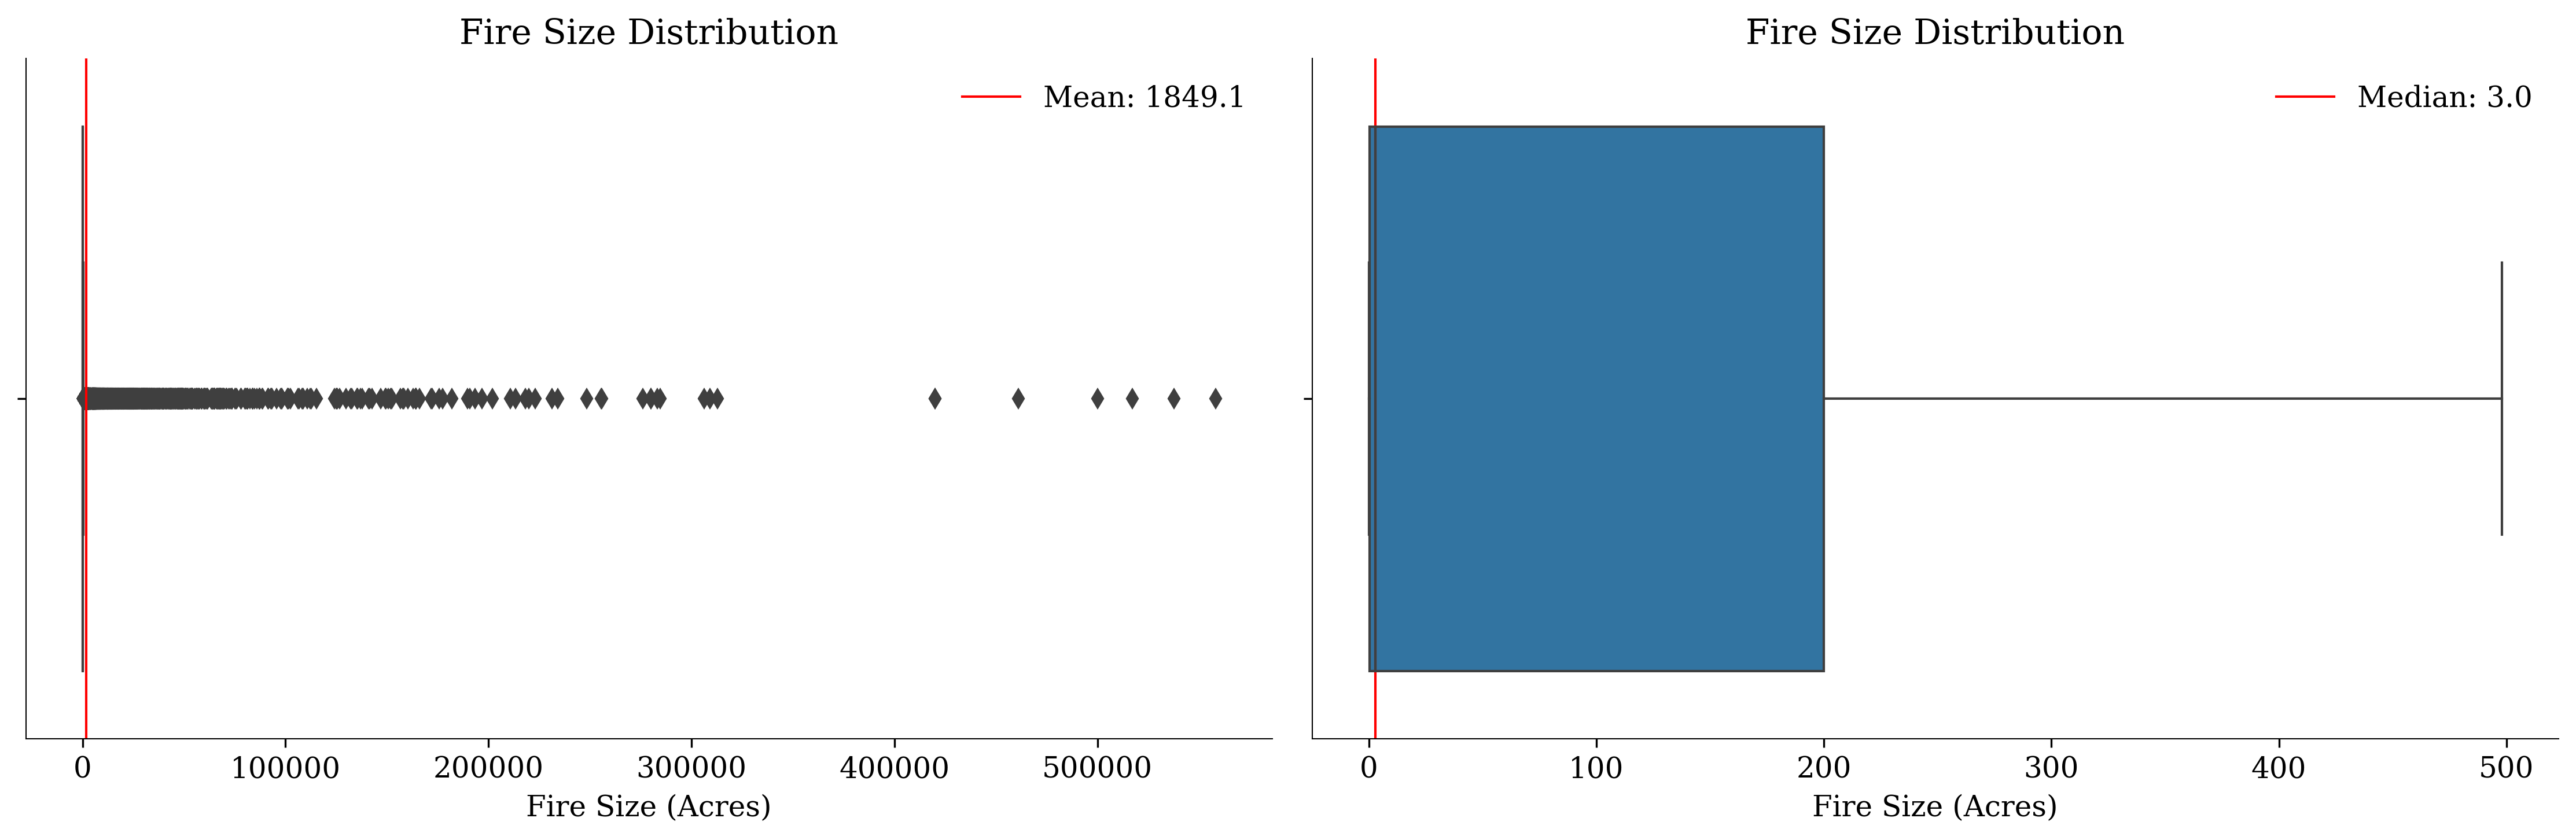

In [132]:
plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Fire Size Distribution')
sns.boxplot(x=df['FIRE_SIZE'])
plt.axvline(x=df['FIRE_SIZE'].mean(), color='red', label=f'Mean: {df["FIRE_SIZE"].mean():.1f}')
plt.xlabel('Fire Size (Acres)')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Fire Size Distribution')
plt.axvline(x=df['FIRE_SIZE'].median(), color='red', label=f'Median: {df["FIRE_SIZE"].median():.1f}')
sns.boxplot(x=df['FIRE_SIZE'], showfliers=False)
plt.xlabel('Fire Size (Acres)')
plt.legend()

plt.show()

As we can see, the distribution of the fire sizes is extremely skewed. The median value is extremely small, whereas the mean is far larger in comparison. Consquently, the distribution of `FIRE_SIZE_CLASS` is equally uneven.

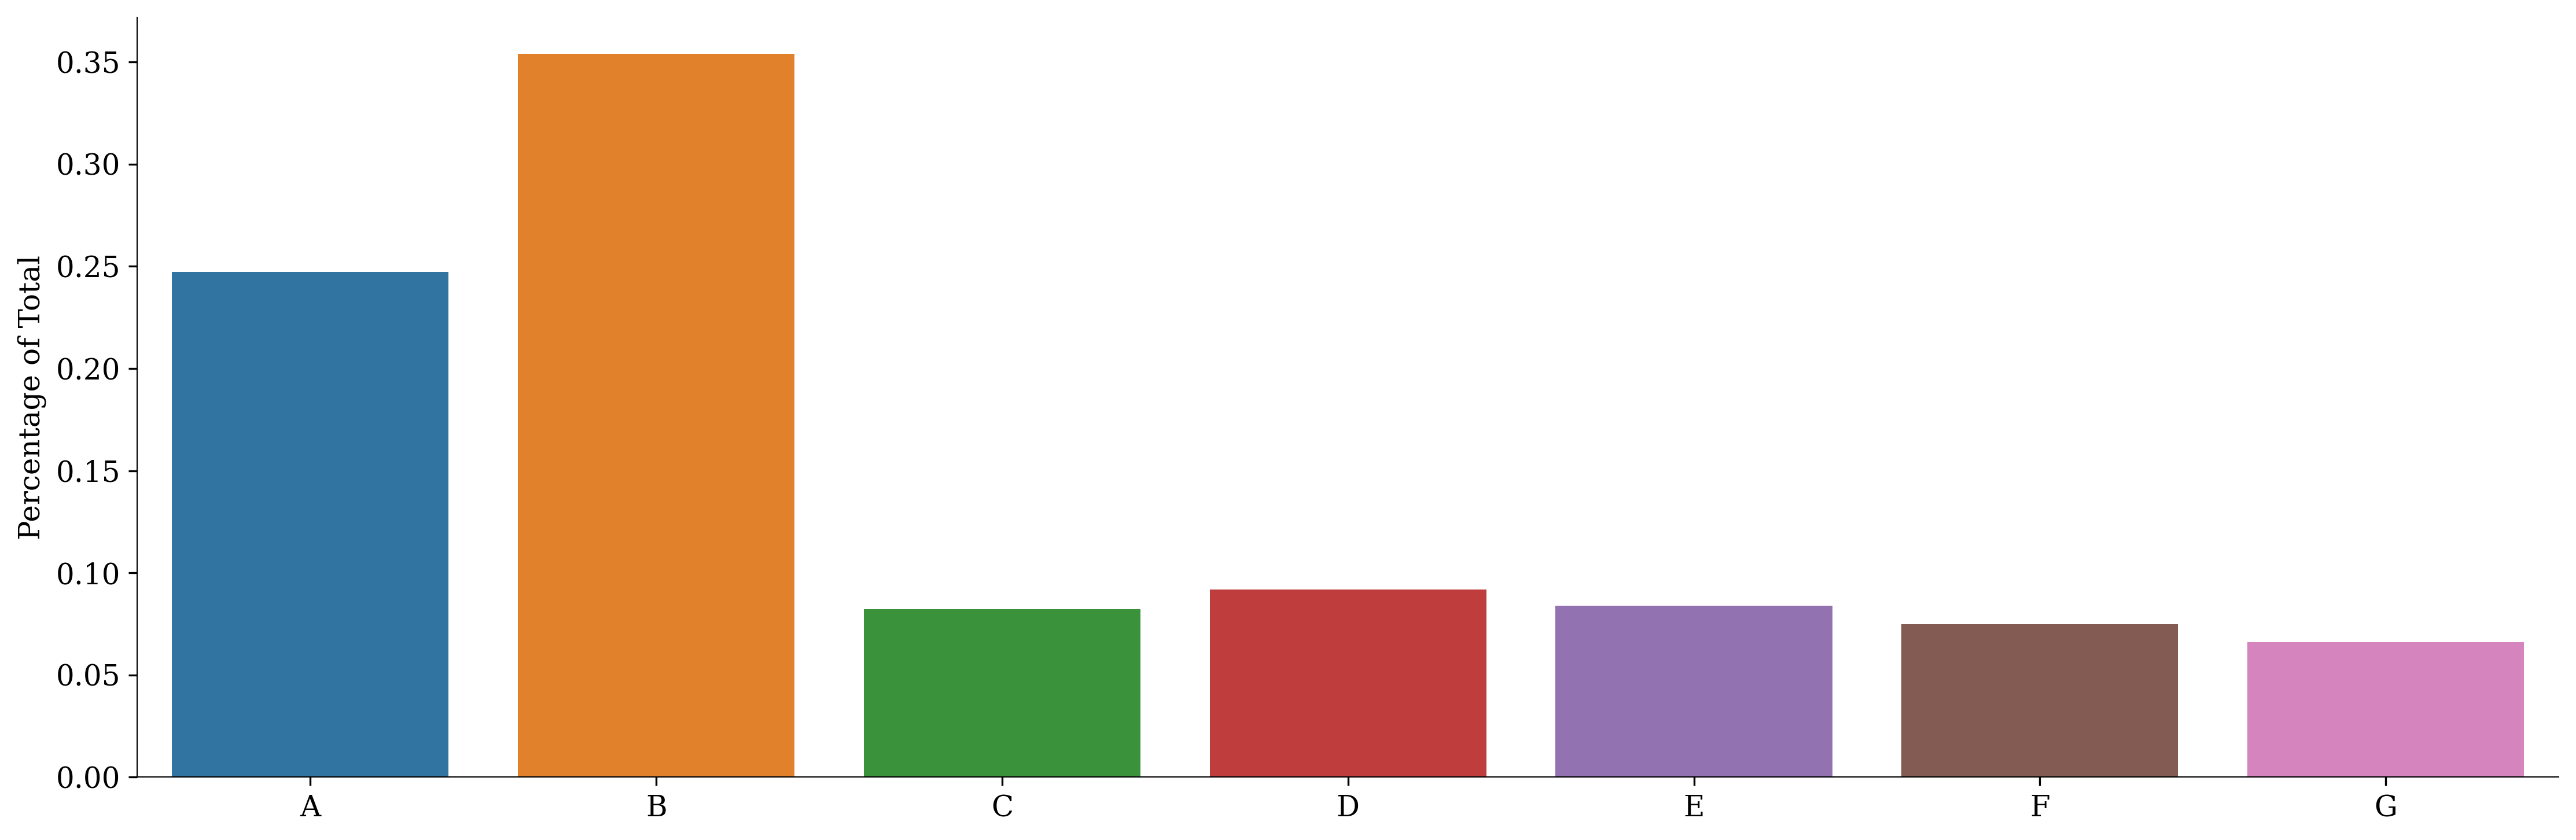

In [134]:
fire_size_class_df = utils.count_percentage_df(df['FIRE_SIZE_CLASS']).sort_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=fire_size_class_df,
            x=fire_size_class_df.index,
            y='Percentage of Total')
plt.show()

### Downsampling

As we want to get even samples from each class, we first need to see the way in which the samples are distributed.

In [135]:
fire_size_class_df

Count  Percentage of Total
A   7355             0.247360
B  10529             0.354106
C   2441             0.082095
D   2728             0.091747
E   2494             0.083877
F   2222             0.074729
G   1965             0.066086

We see that the lowest value, unsurprisingly, is `FIRE_SIZE_CLASS` G, which has 1965 observations. We will therefore take samples of size 1965 from each of the other classes, to get an even distribution.

In [112]:
# Create DataFrame
df_condensed = pd.DataFrame()

# Get the fire classes
fire_classes = df['FIRE_SIZE_CLASS'].unique()

# Get equal sample from each FIRE_SIZE_CLASS
for fire_class in fire_classes:
    tmp = df[df['FIRE_SIZE_CLASS'] == fire_class]
    df_condensed = pd.concat([df_condensed, tmp.sample(1965)])

In [165]:
df_condensed.shape

(13755, 85)

In [166]:
utils.count_percentage_df(df_condensed['FIRE_SIZE_CLASS'])

Count  Percentage of Total
A   1965             0.142857
B   1965             0.142857
C   1965             0.142857
D   1965             0.142857
E   1965             0.142857
F   1965             0.142857
G   1965             0.142857

Having collected an even distribution of samples, we will now create a Logistic Regression. As with the Linear Regression model, we will use the same scaling methods as previously.

In [167]:
from sklearn.model_selection import train_test_split

X = df_condensed.drop(['FIRE_SIZE','FIRE_SIZE_CLASS'], axis=1)
y = df_condensed['FIRE_SIZE_CLASS']

# Create remainder and test
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [168]:
robust_cols = ['precip_variance', 'ch4', 'n2o', 'co2']
minmax_cols = ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
state_cols = [col for col in X_train.columns
              if 'state' in col]
ss_cols = [col for col in X_train.columns
           if col not in robust_cols
           if col not in minmax_cols
           if col not in state_cols]

In [169]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Create column transformation list
col_transforms = [('standard scale', StandardScaler(), ss_cols),
                  ('minmax scale', MinMaxScaler(), minmax_cols), 
                  ('robust scale', RobustScaler(), robust_cols)]

# Create the column transformer
col_transformer = ColumnTransformer(col_transforms, remainder='passthrough')

# Fit to X_train
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard scale', StandardScaler(),
                                 ['avg_tempmax', 'avg_temp', 'avg_humidity',
                                  'avg_precip', 'avg_dew', 'avg_windspeed',
                                  'avg_winddir', 'avg_pressure',
                                  'tempmax_variance', 'tempmax_delta',
                                  'temp_variance', 'temp_delta',
                                  'humidity_variance', 'humidity_delta',
                                  'precip_delta', 'dew_variance', 'dew_delta',
                                  'windspeed_variance', 'windspeed_delta',
                                  'winddir_variance', 'winddir_delta',
                                  'pressure_variance', 'pressure_delta']),
                                ('minmax scale', MinMaxScaler(),
                                 ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE',
                    

In [170]:
# Transform the train and validation set
X_train_transformed = col_transformer.transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

In [171]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [172]:
logreg.score(X_train_transformed, y_train)

0.3362413667757179

In [173]:
X_test_transformed =  col_transformer.transform(X_test)
logreg.score(X_test_transformed, y_test)

0.32897128316975643

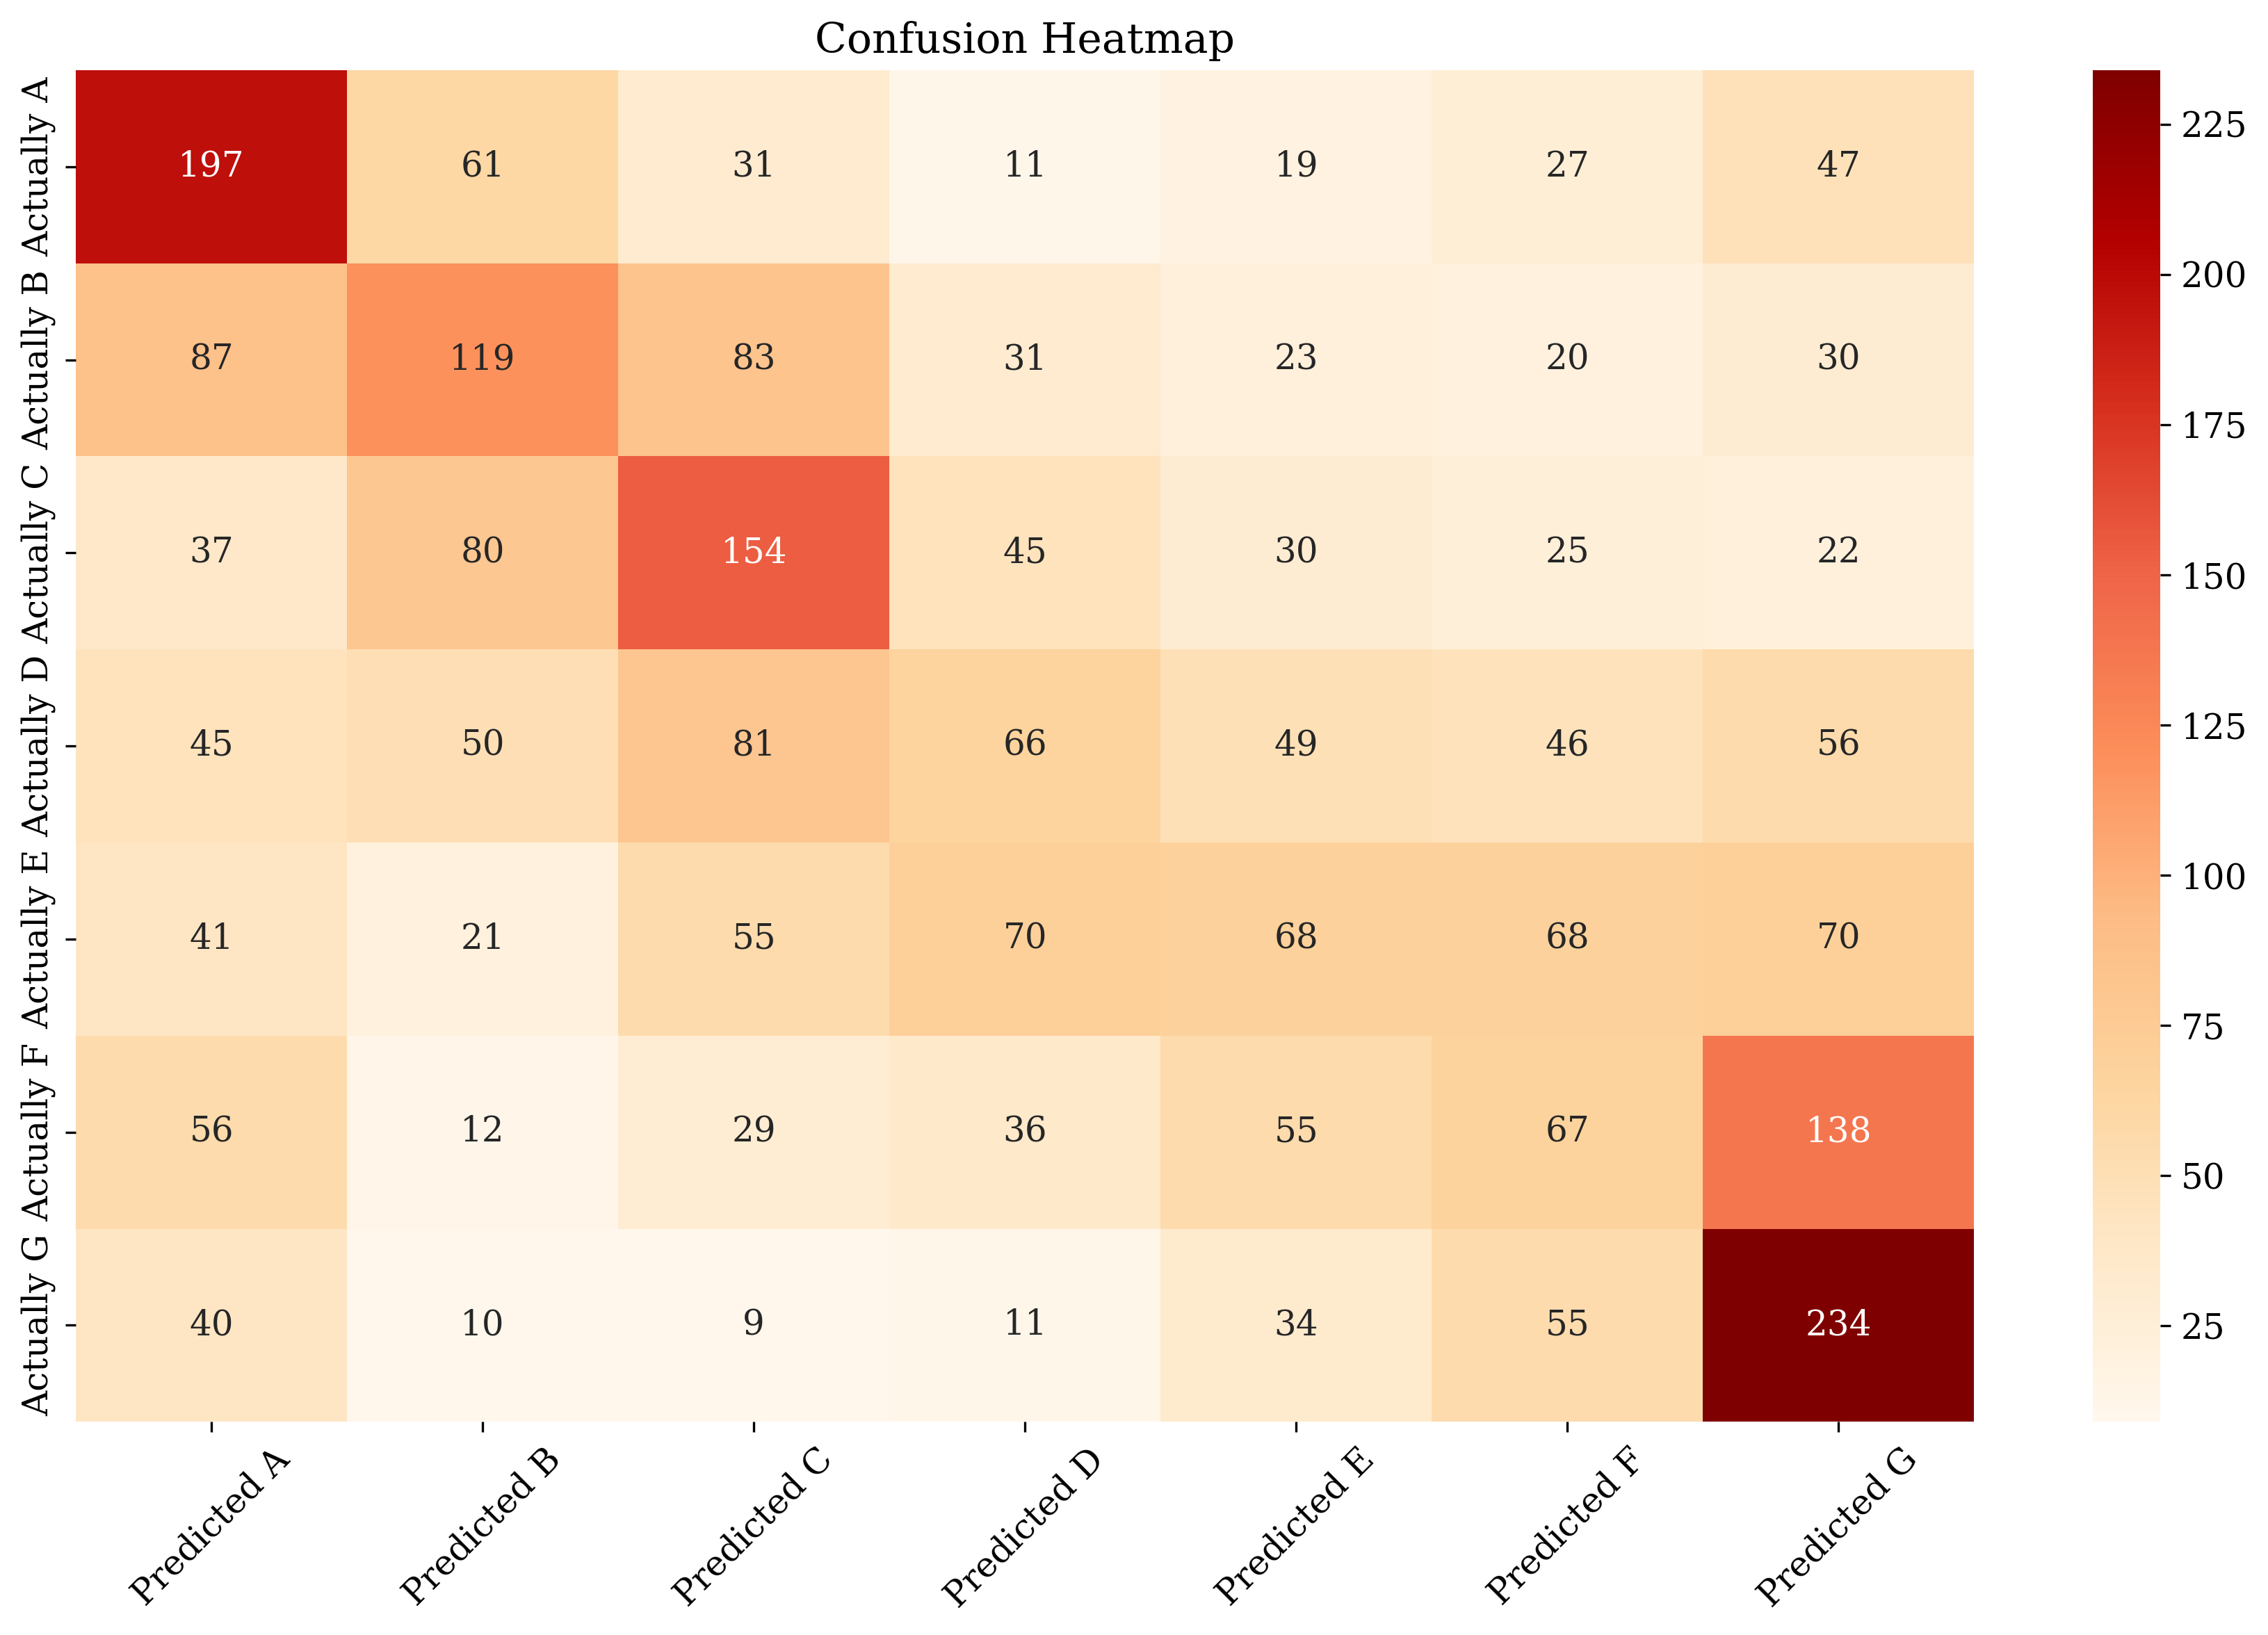

              precision    recall  f1-score   support

           A       0.39      0.50      0.44       393
           B       0.34      0.30      0.32       393
           C       0.35      0.39      0.37       393
           D       0.24      0.17      0.20       393
           E       0.24      0.17      0.20       393
           F       0.22      0.17      0.19       393
           G       0.39      0.60      0.47       393

    accuracy                           0.33      2751
   macro avg       0.31      0.33      0.31      2751
weighted avg       0.31      0.33      0.31      2751



In [177]:
model_utils.PlotConfusionMatrix(logreg, X_test_transformed, y_test)

Although the baseline model that we created had a better accuracy score, it did not improve upon the dummy model. In this instance, although we have a lower accuracy score, the model is better at predicting the class of a fire by $\approx19$%.

### Upsampling

In [178]:
# Upsampling using resample
from sklearn.utils import resample

# Get X and y variables
X, y = model_utils.GenerateXy(df)

# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Print Distribution of classes
utils.count_percentage_df(y_train)

Count  Percentage of Total
B   8409             0.353512
A   5851             0.245975
D   2172             0.091310
E   2023             0.085046
C   1990             0.083659
F   1791             0.075293
G   1551             0.065204

In [179]:
filter = ~((y_train == 'B') + (y_train =='A'))

X_upsampled, y_upsampled = resample(X_train[filter], 
                                    y_train[filter],
                                    n_samples=X_train[y_train=='B'].shape[0]*5,
                                    random_state=1)

utils.count_percentage_df(y_upsampled)

Count  Percentage of Total
D   9692             0.230515
E   8939             0.212606
C   8794             0.209157
F   7762             0.184612
G   6858             0.163111

In [180]:
# Combine upsample with original data
X_train_bal = np.vstack((X_train[(y_train == 'B') + (y_train =='A')], X_upsampled))
y_train_bal = np.hstack((y_train[(y_train == 'B') + (y_train =='A')], y_upsampled))

# Check updated distribution
utils.count_percentage_df(pd.Series(y_train_bal))

Count  Percentage of Total
D   9692             0.172134
E   8939             0.158760
C   8794             0.156185
B   8409             0.149347
F   7762             0.137856
G   6858             0.121801
A   5851             0.103916

In [181]:
X_train_bal = pd.DataFrame(X_train_bal, columns=X.columns)

In [182]:
X_train_bal_transformed = col_transformer.fit_transform(X_train_bal)

In [183]:
logreg_balanced = LogisticRegression(max_iter=10000, random_state=1)
logreg_balanced.fit(X_train_bal_transformed, y_train_bal)

LogisticRegression(max_iter=10000, random_state=1)

In [184]:
logreg_balanced.score(X_test, y_test)

/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.06961493189843619

/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


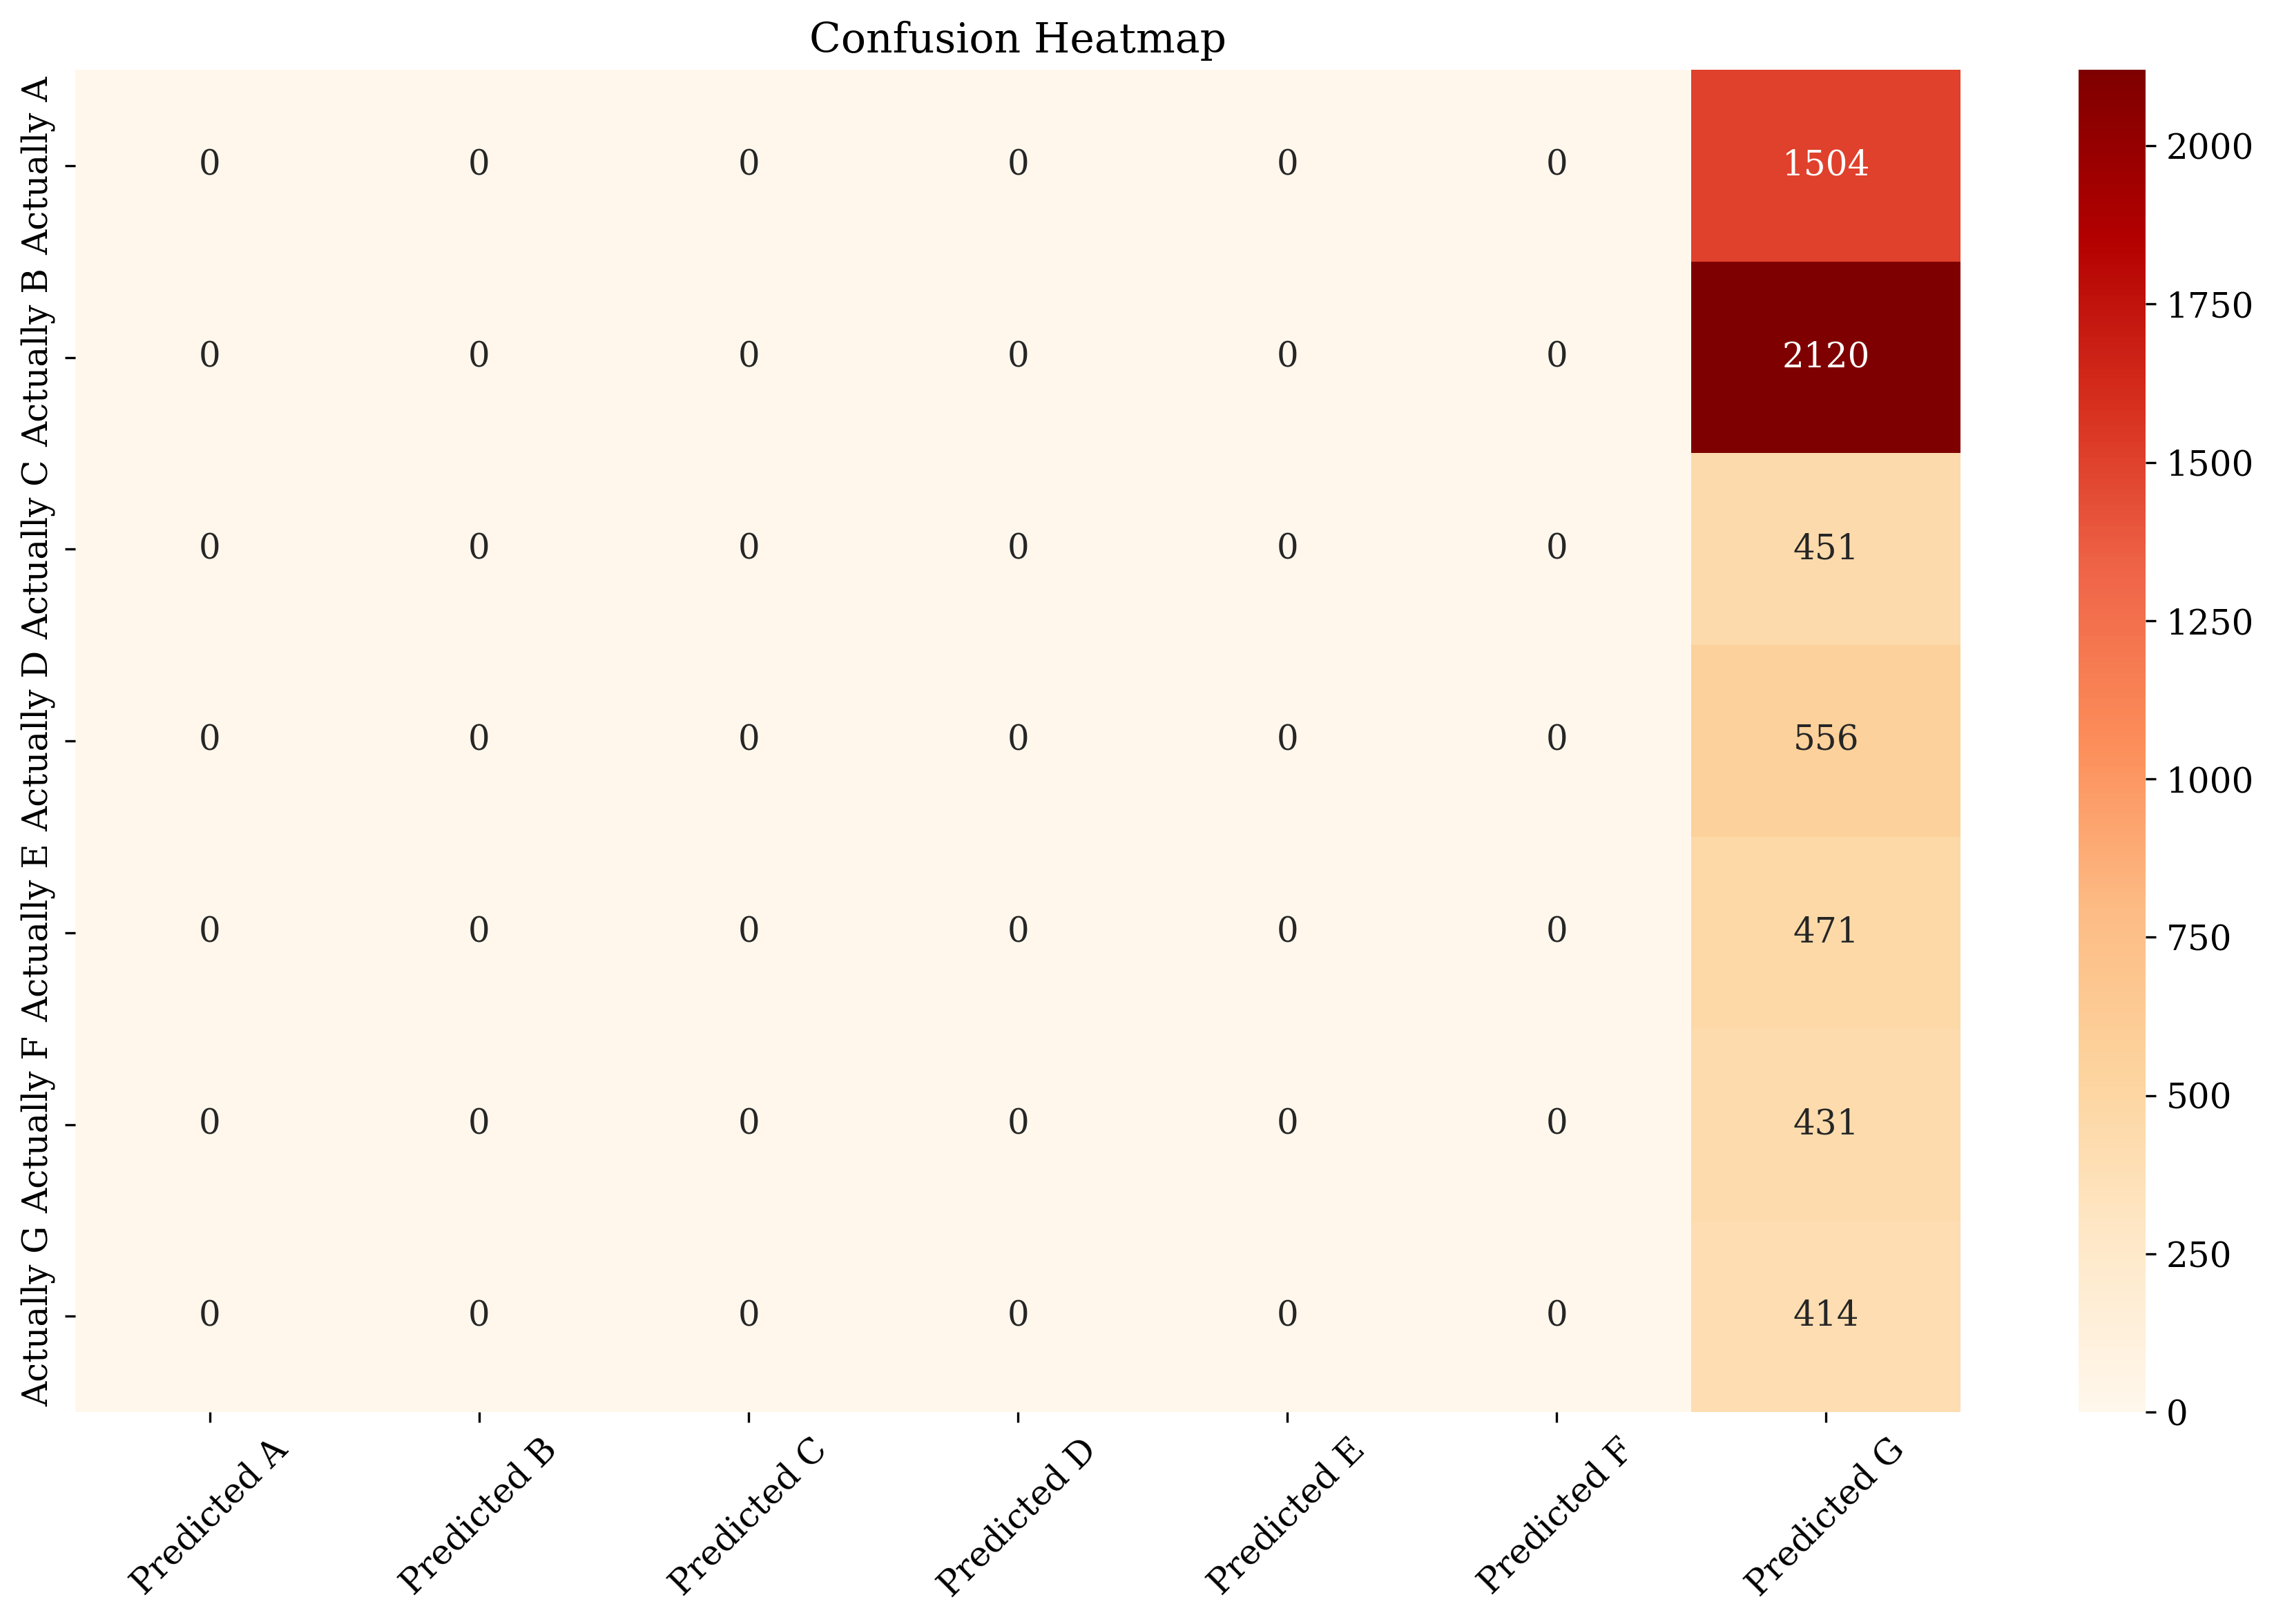

              precision    recall  f1-score   support

           A       0.00      0.00      0.00      1504
           B       0.00      0.00      0.00      2120
           C       0.00      0.00      0.00       451
           D       0.00      0.00      0.00       556
           E       0.00      0.00      0.00       471
           F       0.00      0.00      0.00       431
           G       0.07      1.00      0.13       414

    accuracy                           0.07      5947
   macro avg       0.01      0.14      0.02      5947
weighted avg       0.00      0.07      0.01      5947



/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
model_utils.PlotConfusionMatrix(logreg_balanced, X_test, y_test)

As we can see from the accuracy score, as well as the confusion matrix, upsampling was unsuccessful in improving the model. Surprisingly, the model predicts that all the fires are of `FIRE_SIZE_CLASS` G, which is surprising considering that in previous models there was at least some distinction between the models. Perhaps we can improve upon this model by using Synthetic Minority Oversampling Technique (SMOTE) as an alternative.

### SMOTE

In [187]:
from imblearn.over_sampling import SMOTE

# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_sm, y_train_sm = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [188]:
X_train_sm_transformed = pd.DataFrame(X_train_sm, columns=X.columns)
X_train_sm_transformed.shape

(58863, 83)

In [189]:
utils.count_percentage_df(y_train_sm)

Count  Percentage of Total
B   8409             0.142857
E   8409             0.142857
A   8409             0.142857
C   8409             0.142857
D   8409             0.142857
G   8409             0.142857
F   8409             0.142857

This time, we have been able to generate more samples than previously, while not simply just reusing samples as in the methods tried previously.

In [ ]:
X_train_sm_transformed = col_transformer.transform(X_train_sm_transformed)

# Create base logistic regression
smote_logreg = LogisticRegression(max_iter=10000)
smote_logreg.fit(X_train_sm, y_train_sm)

In [ ]:
smote_logreg.score(X_train_sm, y_train_sm)

In [ ]:
X_test_transformed = col_transformer.transform(X_test)
smote_logreg.score(X_test_transformed, y_test)


In [ ]:
model_utils.PlotConfusionMatrix(smote_logreg, X_test_transformed, y_test)

## Feature Engineering

Using L1 penalty, we should be able to find the variables that account for the changes the most.

In [45]:
log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1')
log_reg_l1.fit(X_train_transformed, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [46]:
log_reg_l1.score(X_test_transformed, y_test)

0.31006906579425664

In [47]:
c_values = [10 ** x for x in range(-6, 6)]

train_accuracies = []
validation_accuracies = []

for c in c_values:
    log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1', C=c, random_state=1)
    log_reg_l1.fit(X_train_transformed, y_train)
    
    train_accuracies.append(log_reg_l1.score(X_train_transformed, y_train))
    validation_accuracies.append(log_reg_l1.score(X_validation_transformed, y_validation))    

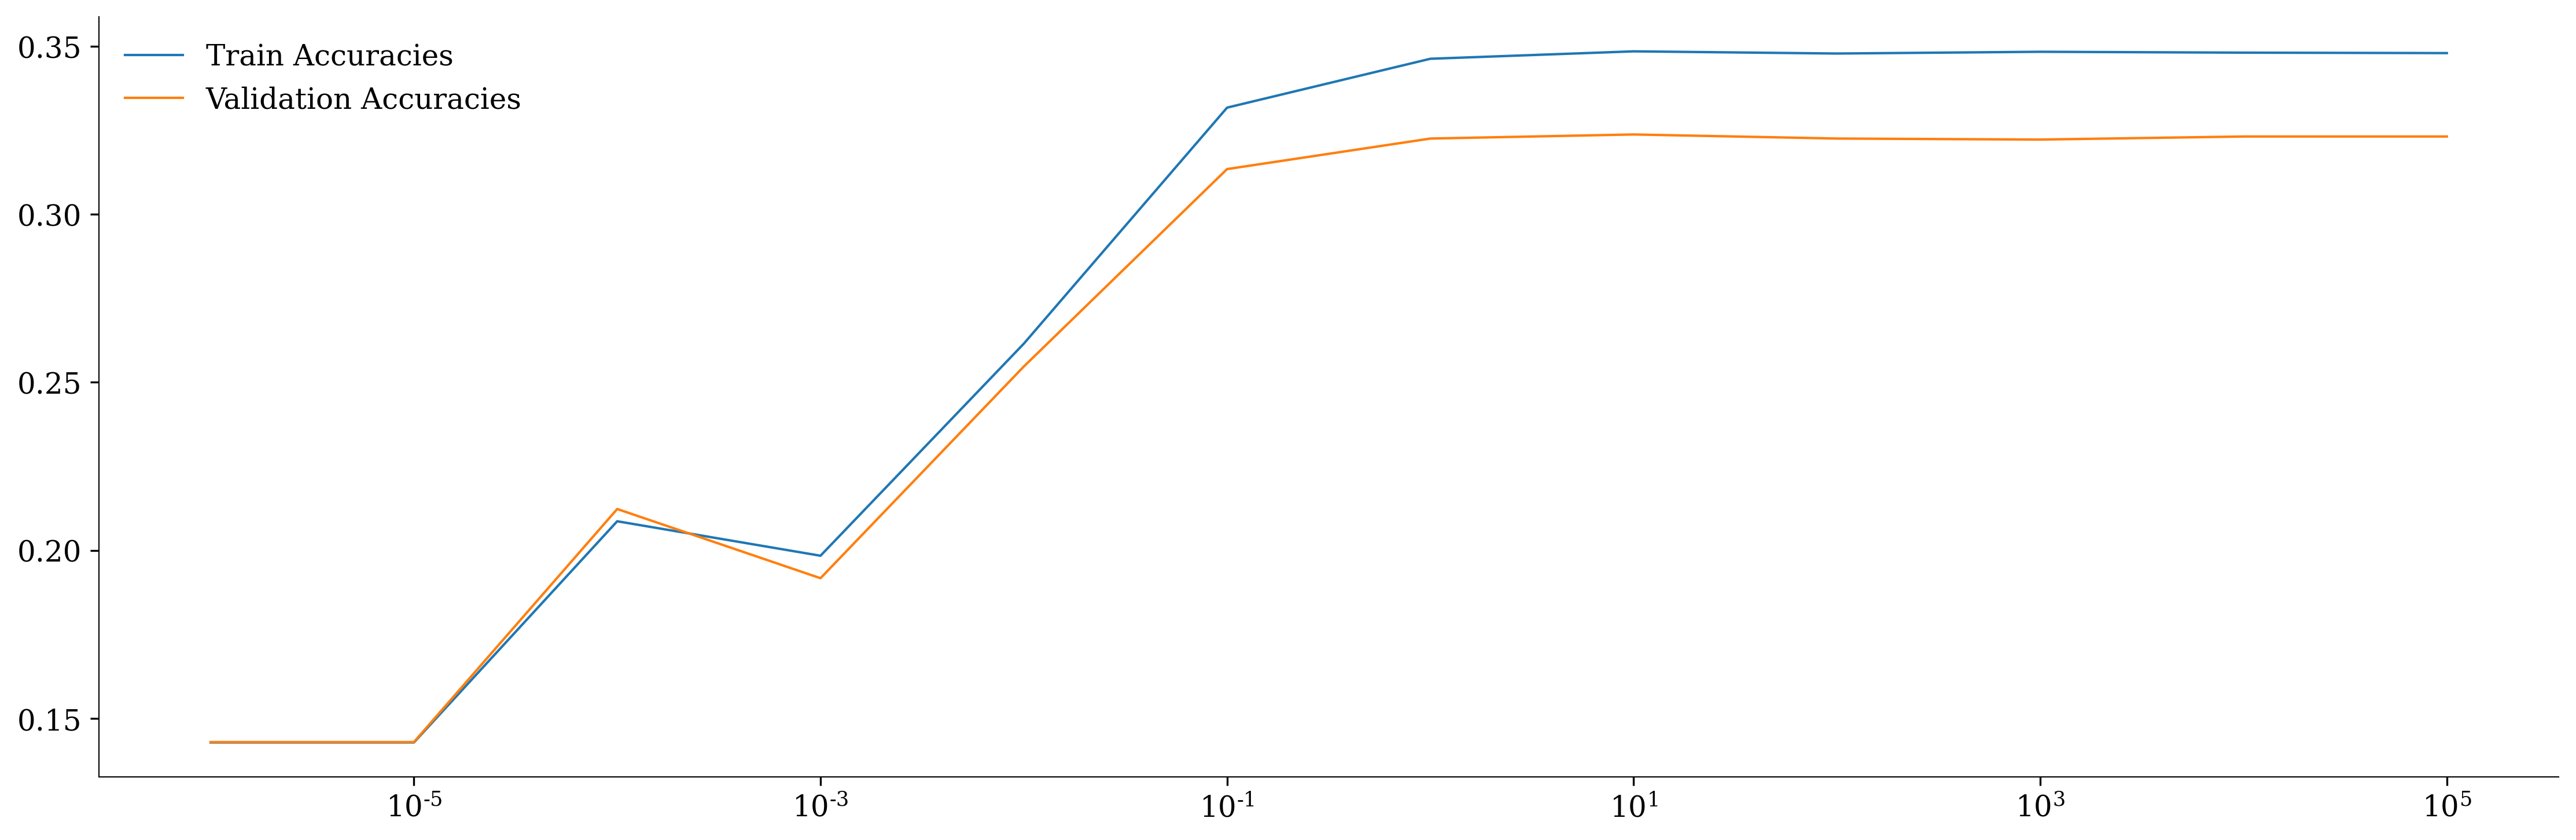

In [48]:
plt.figure(dpi=300, figsize=(15, 5))
sns.lineplot(x=c_values, y=train_accuracies, label='Train Accuracies')
sns.lineplot(x=c_values, y=validation_accuracies, label='Validation Accuracies')
plt.xscale('log')
plt.legend()
plt.show()

In [49]:
print(f'The highest validation accuracy was achieved with a c value of {c_values[np.argmax(validation_accuracies)]}')

The highest validation accuracy was achieved with a c value of 10


In [50]:
log_reg_c = LogisticRegression(solver='liblinear', penalty='l1', C=100)
log_reg_c.fit(X_train_transformed, y_train)

print(f'Test accuracy with a c value of 10: {log_reg_c.score(X_test_transformed, y_test)}')

Test accuracy with a c value of 10: 0.3126135950563432


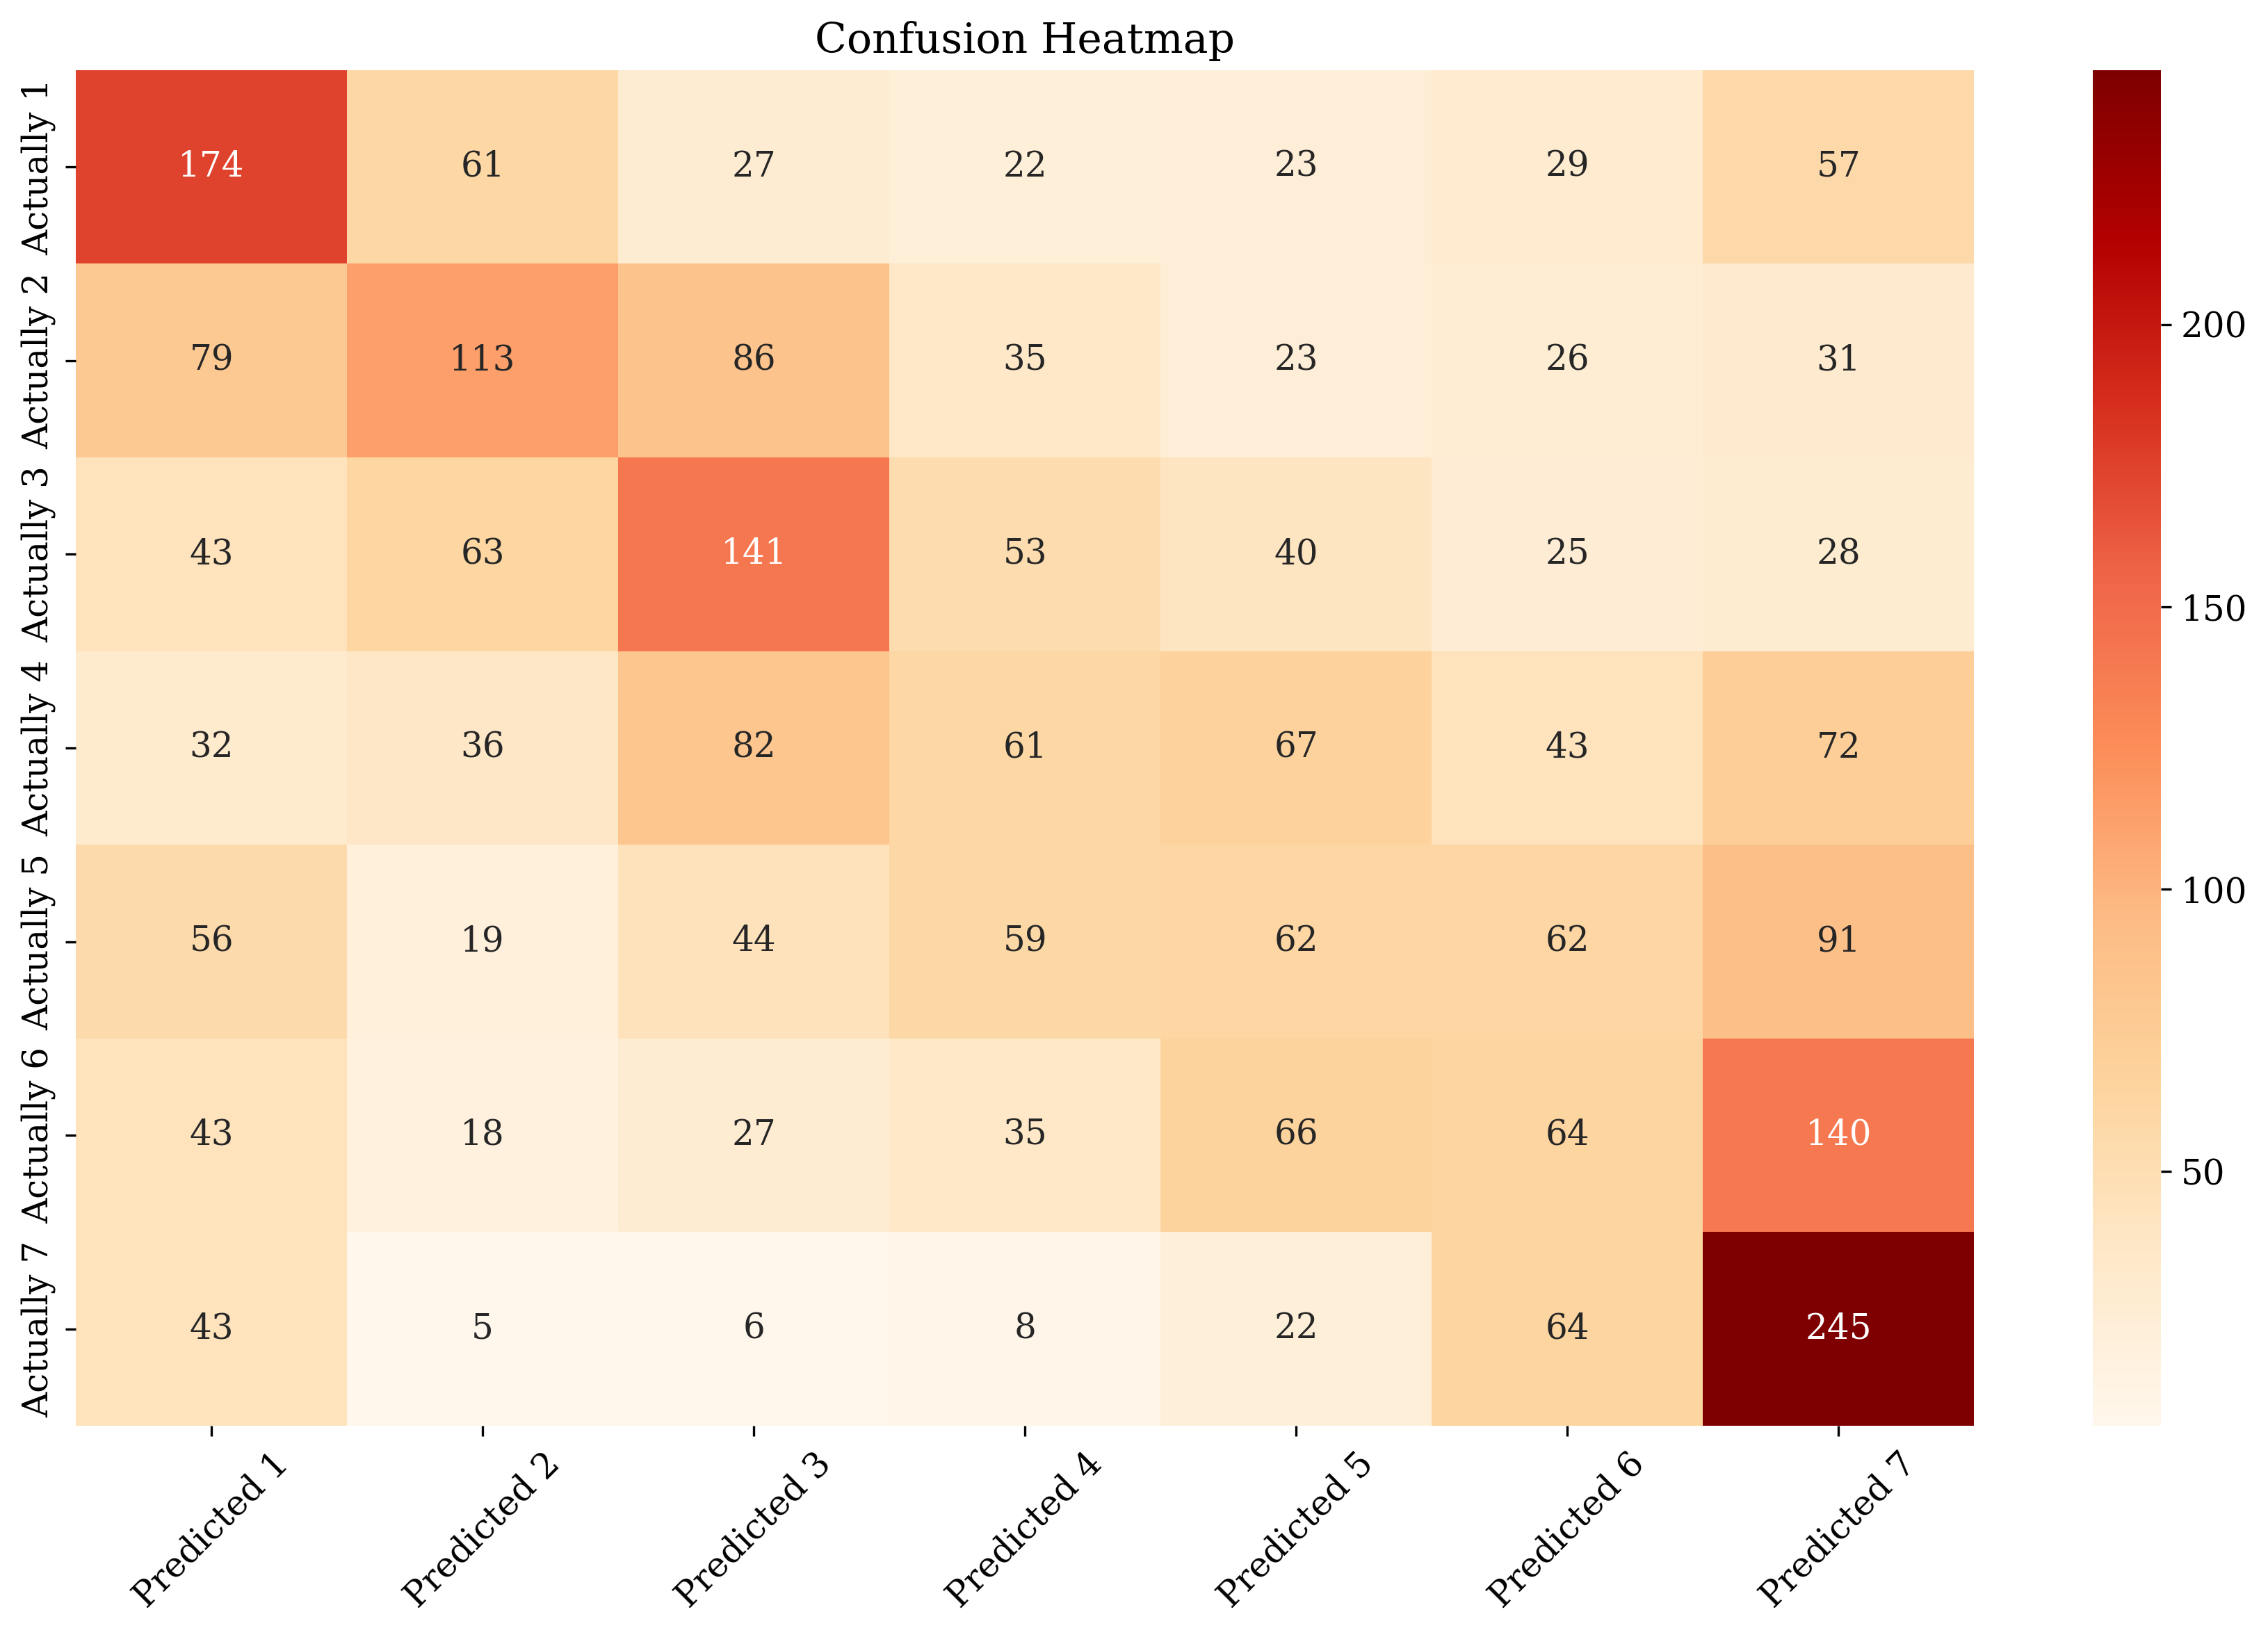

              precision    recall  f1-score   support

           A       0.37      0.44      0.40       393
           B       0.36      0.29      0.32       393
           C       0.34      0.36      0.35       393
           D       0.22      0.16      0.18       393
           E       0.20      0.16      0.18       393
           F       0.20      0.16      0.18       393
           G       0.37      0.62      0.46       393

    accuracy                           0.31      2751
   macro avg       0.30      0.31      0.30      2751
weighted avg       0.30      0.31      0.30      2751



In [51]:
import model_utils

model_utils.PlotConfusionMatrix(log_reg_c, X_test_transformed, y_test)

What are the values that the model deems the most important? Using a lower C value will reduce the number of features in the model as it will reduce their coefficients to 0. We can therefore use the L1 penalty in conjunction with a low C value to extract the most informative features.

In [52]:
logreg = LogisticRegression(solver='liblinear', penalty='l1', C=0.001)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
pd.DataFrame(logreg.coef_, columns=X.columns)

FIRE_YEAR  DISCOVERY_DOY  LATITUDE  LONGITUDE  avg_tempmax  avg_temp  \
0        0.0            0.0       0.0        0.0          0.0       0.0   
1        0.0            0.0       0.0        0.0          0.0       0.0   
2        0.0            0.0       0.0        0.0          0.0       0.0   
3        0.0            0.0       0.0        0.0          0.0       0.0   
4        0.0            0.0       0.0        0.0          0.0       0.0   
5        0.0            0.0       0.0        0.0          0.0       0.0   
6        0.0            0.0       0.0        0.0          0.0       0.0   

   avg_humidity  avg_precip  avg_dew  avg_windspeed  avg_winddir  \
0           0.0         0.0      0.0            0.0          0.0   
1           0.0         0.0      0.0            0.0          0.0   
2           0.0         0.0      0.0            0.0          0.0   
3           0.0         0.0      0.0            0.0          0.0   
4           0.0         0.0      0.0            0.0          0.0   
5           0.0         0.0      0.0            0.0          0.0   
6           0.0         0.0      0.0            0.0          0.0   

   avg_pressure  ch4  co2  n2o  tempmax_variance  tempmax_delta  \
0           0.0  0.0  0.0  0.0               0.0            0.0   
1           0.0  0.0  0.0  0.0               0.0            0.0   
2           0.0  0.0  0.0  0.0               0.0            0.0   
3           0.0  0.0  0.0  0.0               0.0            0.0   
4           0.0  0.0  0.0  0.0               0.0            0.0   
5           0.0  0.0  0.0  0.0               0.0            0.0   
6           0.0  0.0  0.0  0.0               0.0            0.0   

   temp_variance  temp_delta  humidity_variance  humidity_delta  \
0            0.0         0.0                0.0             0.0   
1            0.0         0.0                0.0             0.0   
2            0.0         0.0                0.0             0.0   
3            0.0         0.0                0.0             0.0   
4            0.0         0.0                0.0             0.0   
5            0.0         0.0                0.0             0.0   
6            0.0         0.0                0.0             0.0   

   precip_variance  precip_delta  dew_variance  dew_delta  windspeed_variance  \
0              0.0           0.0           0.0        0.0                 0.0   
1              0.0           0.0           0.0        0.0                 0.0   
2              0.0           0.0           0.0        0.0                 0.0   
3              0.0           0.0           0.0        0.0                 0.0   
4              0.0           0.0           0.0        0.0                 0.0   
5              0.0           0.0           0.0        0.0                 0.0   
6              0.0           0.0           0.0        0.0                 0.0   

   windspeed_delta  winddir_variance  winddir_delta  pressure_variance  \
0              0.0         -0.003429       0.000000                0.0   
1              0.0          0.000000      -0.004037                0.0   
2              0.0         -0.000147      -0.003757                0.0   
3              0.0         -0.009131       0.000000                0.0   
4              0.0         -0.017042       0.000000                0.0   
5              0.0         -0.012290      -0.002493                0.0   
6              0.0         -0.052567      -0.007573                0.0   

   pressure_delta  state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  \
0        0.001361       0.0       0.0       0.0       0.0       0.0       0.0   
1       -0.000443       0.0       0.0       0.0       0.0       0.0       0.0   
2       -0.009414       0.0       0.0       0.0       0.0       0.0       0.0   
3       -0.004372       0.0       0.0       0.0       0.0       0.0       0.0   
4       -0.010943       0.0       0.0       0.0       0.0       0.0       0.0   
5       -0.008731       0.0       0.0       0.0       0

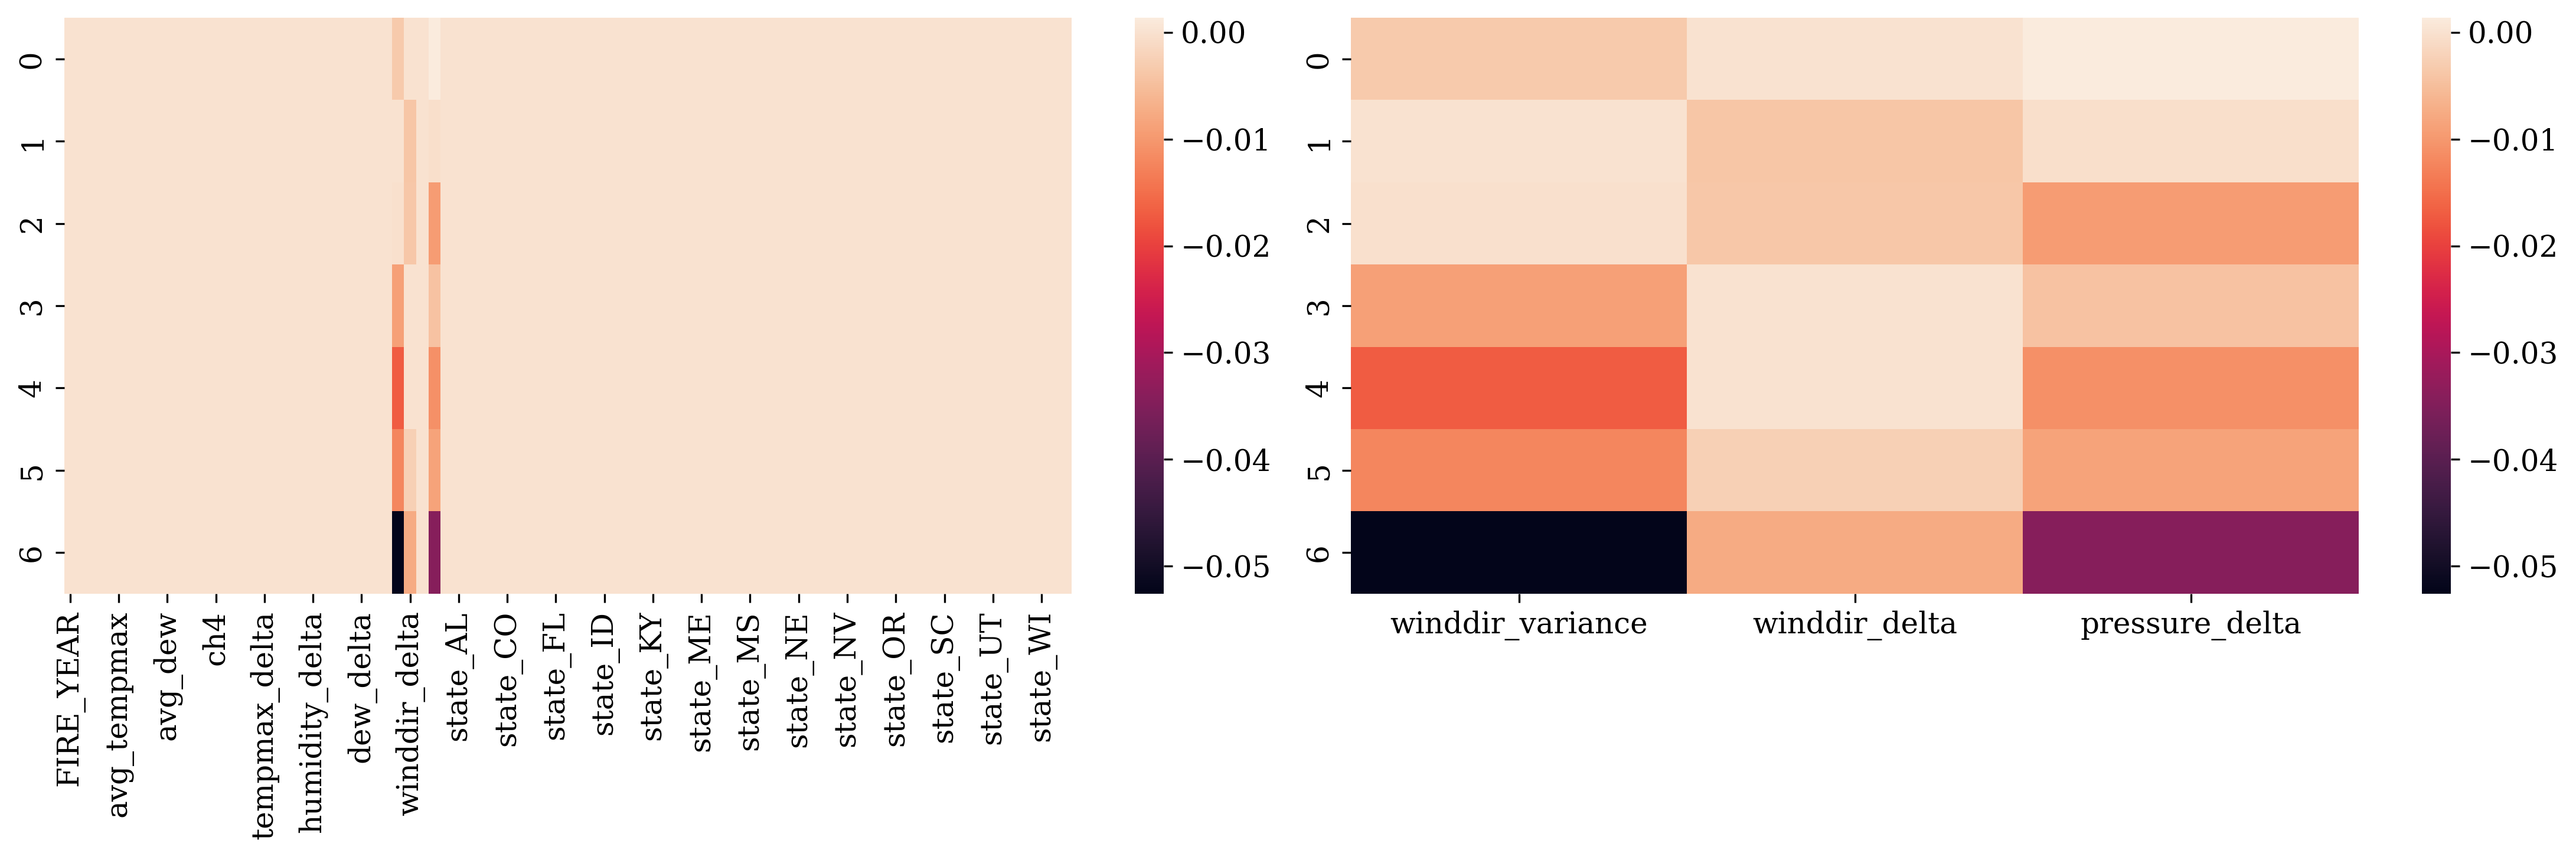

In [55]:
plt.subplots(1, 2, dpi=300, figsize=(15, 5))

# General Overview
plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(logreg.coef_, columns=X.columns))

# Specific features
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(logreg.coef_, columns=X.columns).loc[:, ['winddir_variance', 'winddir_delta', 'pressure_delta']])

plt.show()

These three variables, having used the L1 penalty as a form of feature reduction, are the most important. We can therefore build another model which only looks at these values.

In [56]:
X_reduced = X.loc[:, ['winddir_variance', 'winddir_delta', 'pressure_delta']]

# Create remainder and test
X_rem, X_test, y_rem, y_test = \
train_test_split(X_reduced, y, test_size=0.2, random_state=1, stratify=y)

# Create train and validation
X_train, X_validation, y_train, y_validation = \
train_test_split(X_rem, y_rem, test_size=0.3, random_state=1, stratify=y_rem)

In [57]:
my_ss = StandardScaler()
X_train_transformed = my_ss.fit_transform(X_train)
X_test_transformed = my_ss.transform(X_test)

In [58]:
logreg_reduced = LogisticRegression(random_state=1)
logreg_reduced.fit(X_train_transformed, y_train);

In [59]:
logreg_reduced.score(X_test_transformed, y_test)

0.16066884769174847

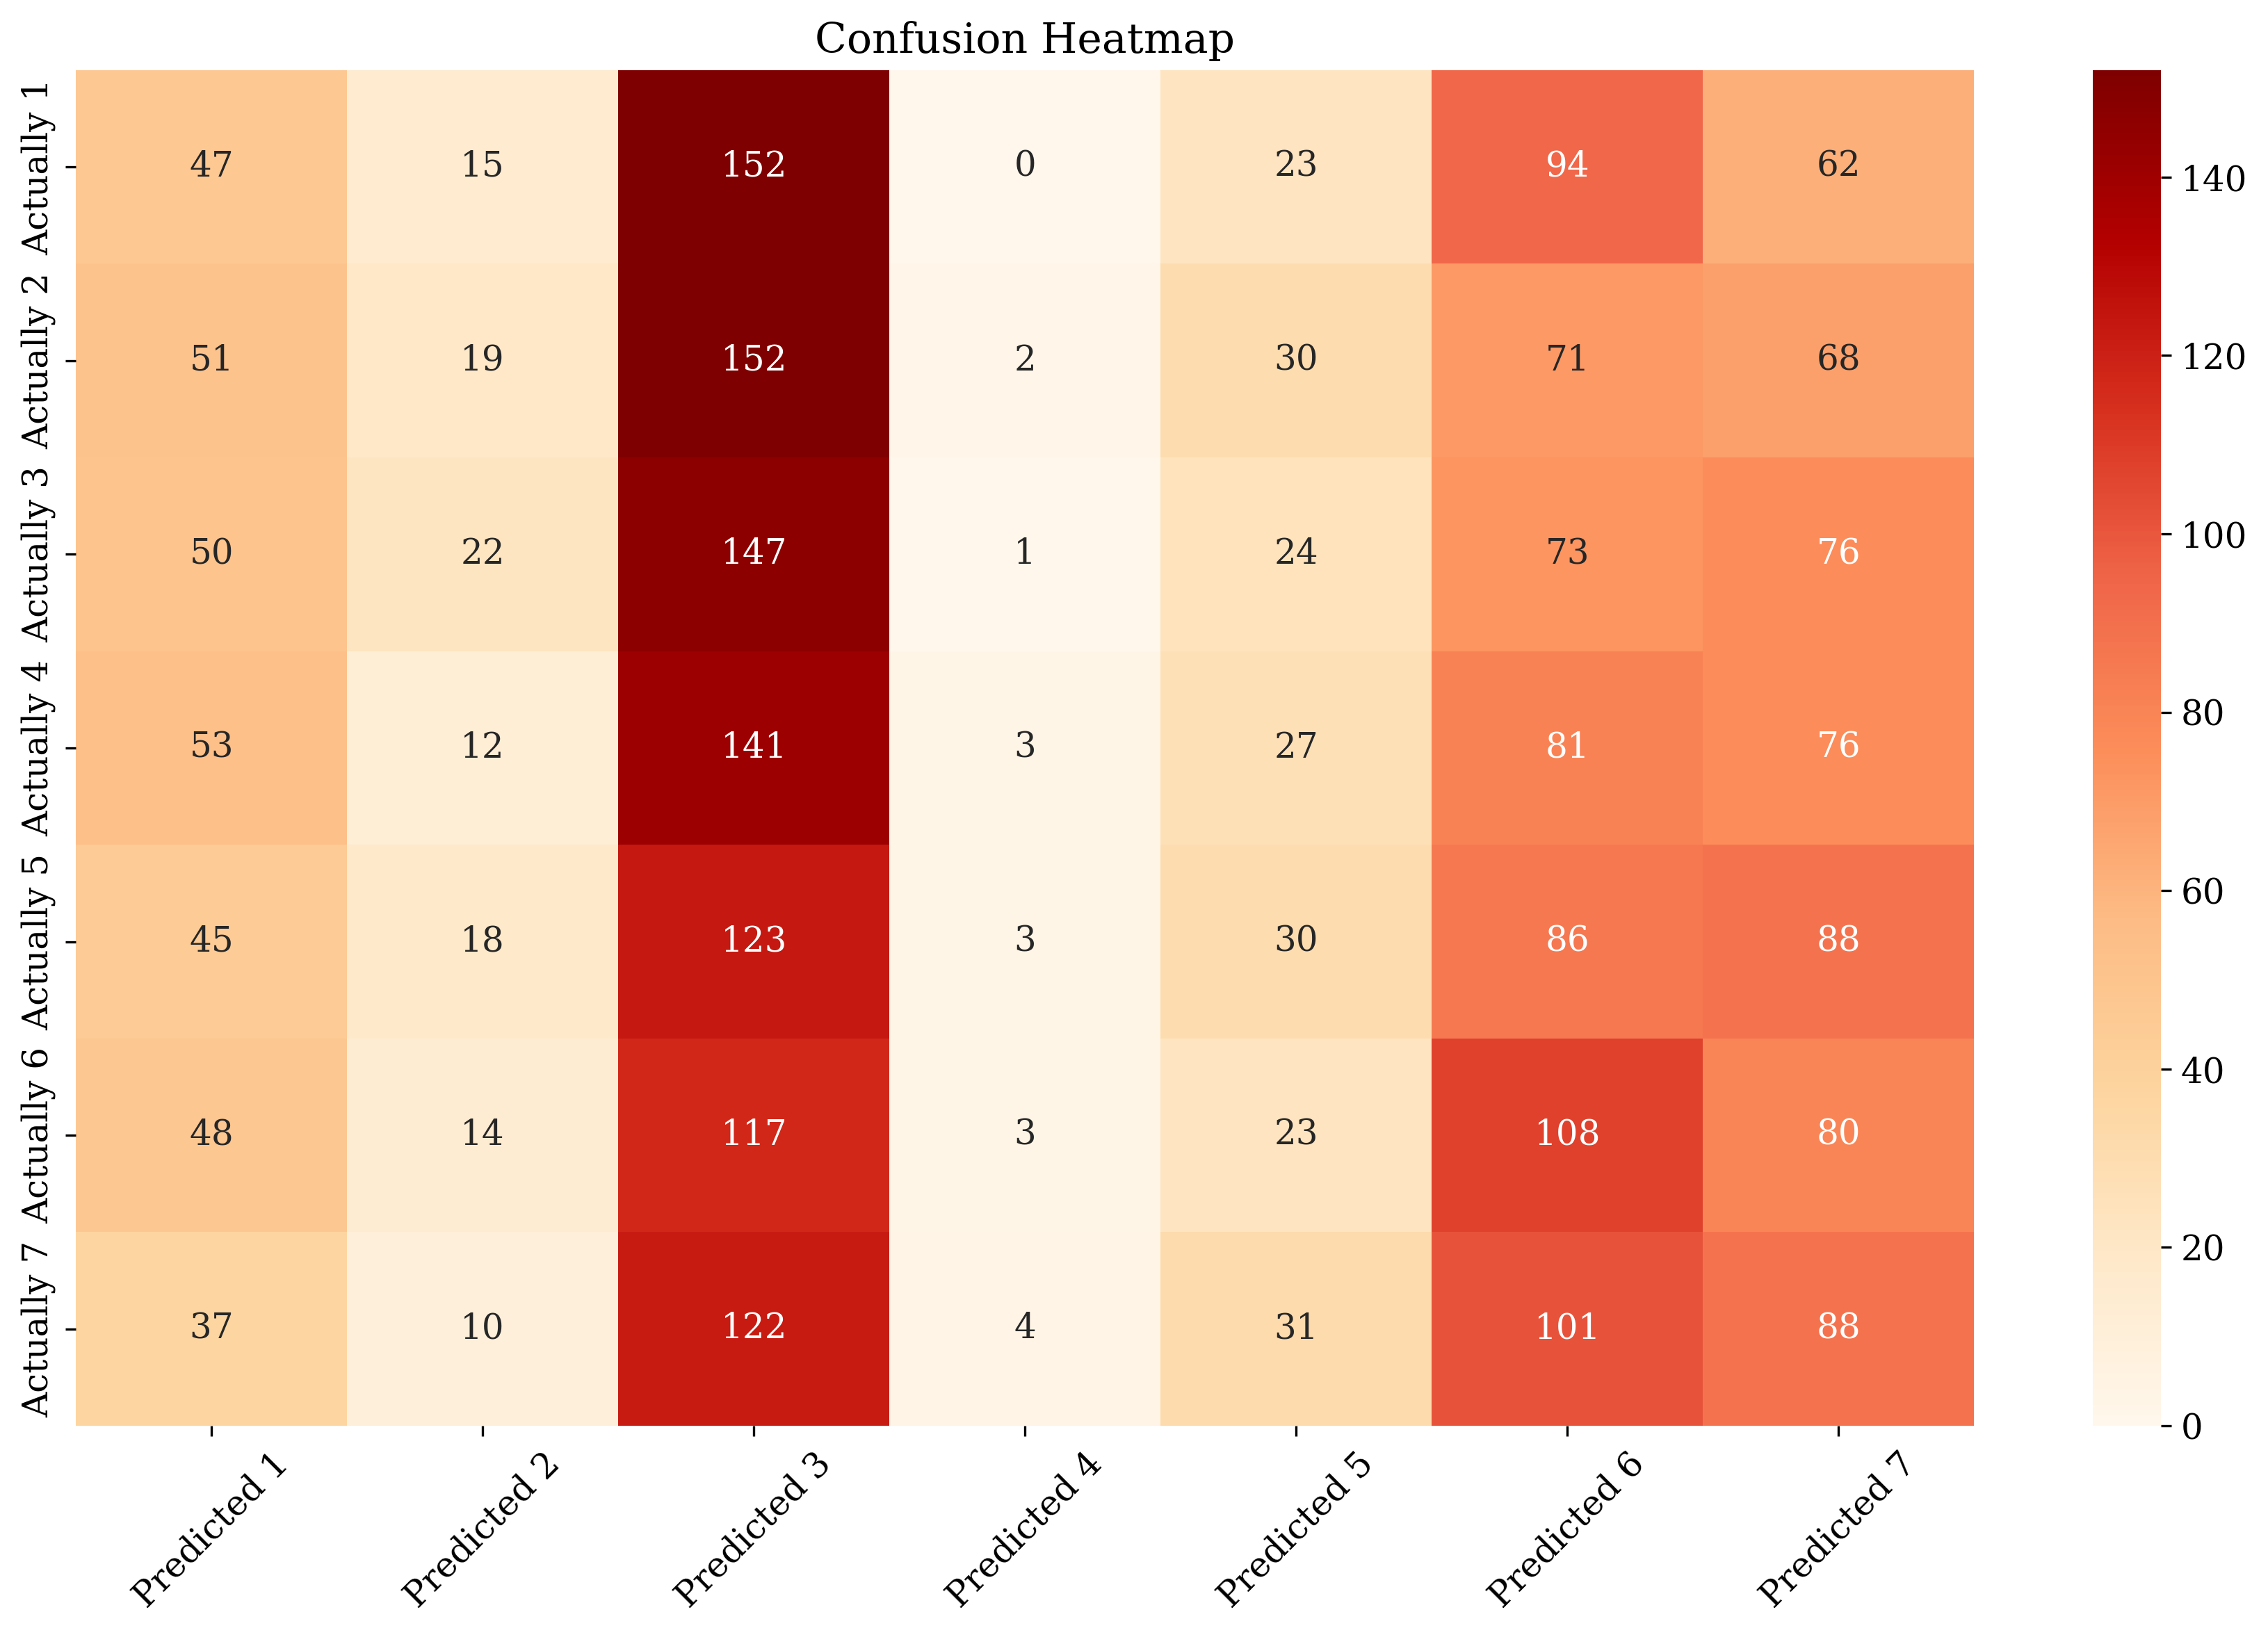

              precision    recall  f1-score   support

           A       0.14      0.12      0.13       393
           B       0.17      0.05      0.08       393
           C       0.15      0.37      0.22       393
           D       0.19      0.01      0.01       393
           E       0.16      0.08      0.10       393
           F       0.18      0.27      0.21       393
           G       0.16      0.22      0.19       393

    accuracy                           0.16      2751
   macro avg       0.17      0.16      0.14      2751
weighted avg       0.17      0.16      0.14      2751



In [60]:
model_utils.PlotConfusionMatrix(logreg_reduced, X_test_transformed, y_test)

## Reducing Dimensionality with PCA

In [61]:
from sklearn.decomposition import PCA

X, y = model_utils.GenerateXy(df_condensed)

# Create train, validate, test split
X_train, X_validation, X_test, y_train, y_validation, y_test = model_utils.train_validate_test(X,y)

# Fit transformer
col_transformer.fit(X_train)

# Transform X_train, X_validation, X_test
X_train_transformed = col_transformer.transform(X_train)
X_validation_transformed = col_transformer.transform(X_validation)
X_test_transformed = col_transformer.transform(X_test)

# Instantiate PCA
my_pca = PCA()

# Fit to scaled data
X_train_pca = my_pca.fit_transform(X_train_transformed)
X_validation_pca = my_pca.transform(X_validation_transformed)

In [62]:
X_train_pca.shape

(7702, 83)

In [63]:
logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train_pca, y_train)
logreg.score(X_validation_pca, y_validation)

0.32222895215021197

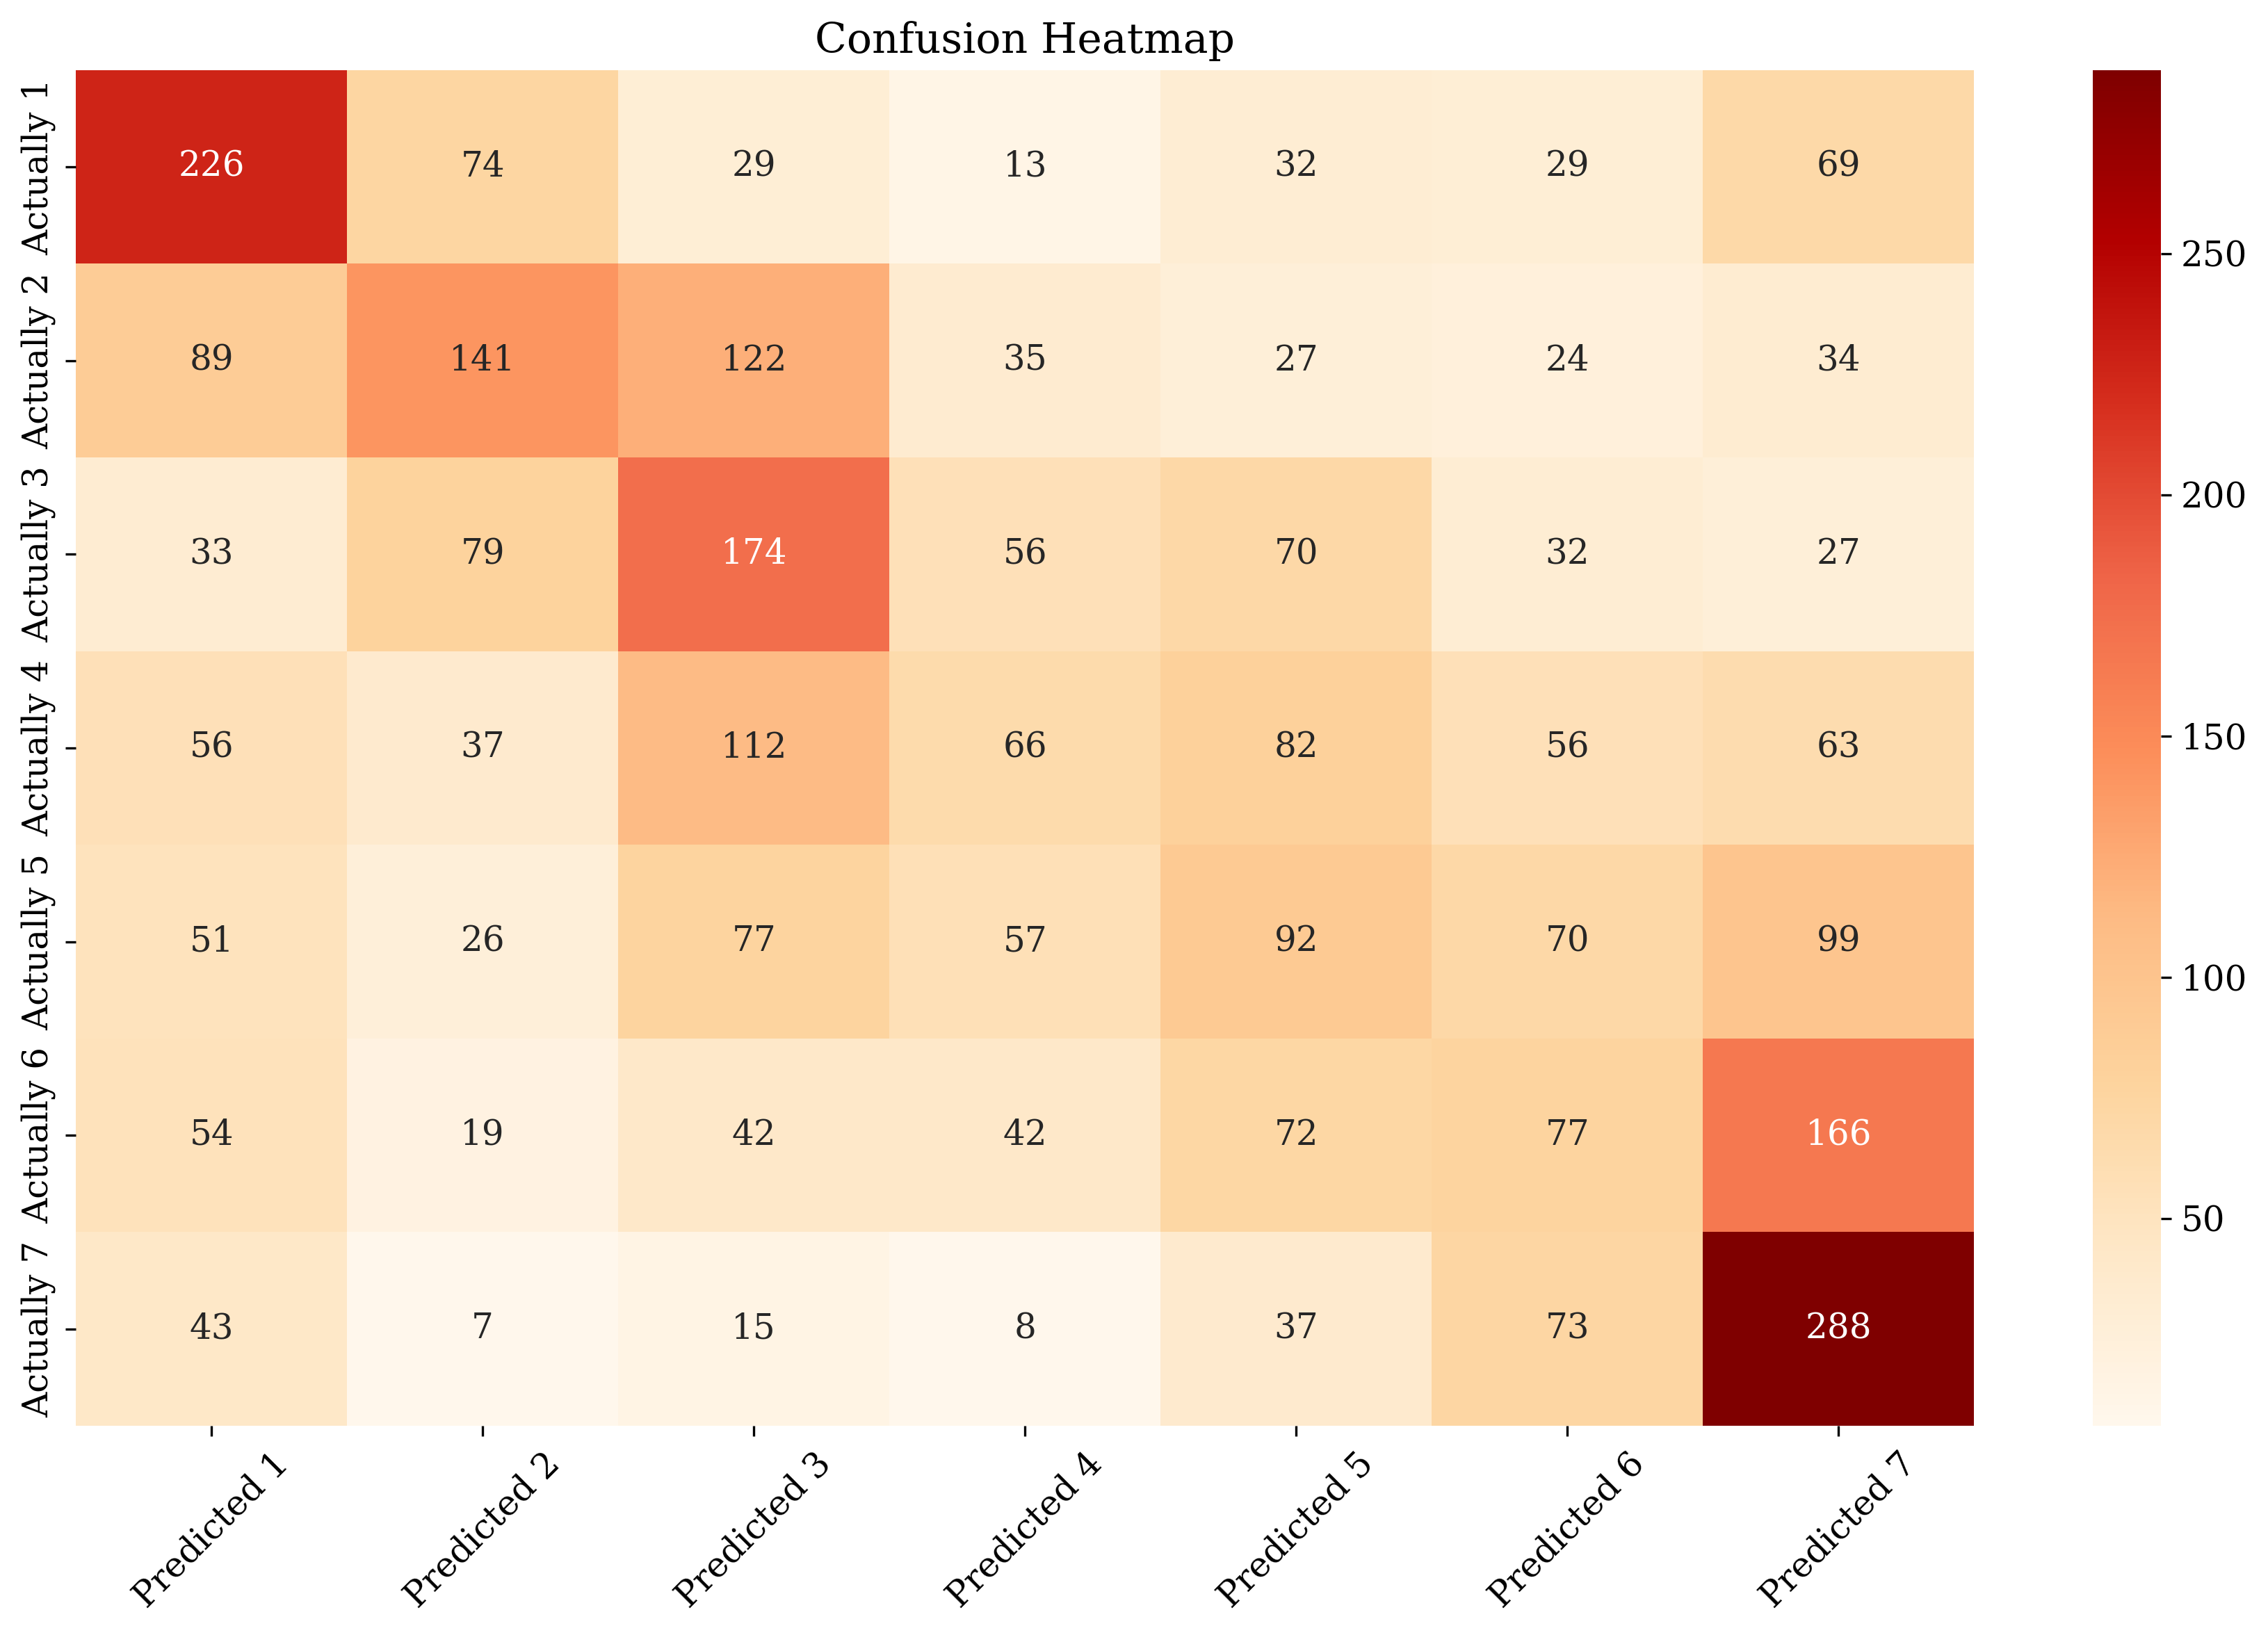

              precision    recall  f1-score   support

           A       0.41      0.48      0.44       472
           B       0.37      0.30      0.33       472
           C       0.30      0.37      0.33       471
           D       0.24      0.14      0.18       472
           E       0.22      0.19      0.21       472
           F       0.21      0.16      0.18       472
           G       0.39      0.61      0.47       471

    accuracy                           0.32      3302
   macro avg       0.31      0.32      0.31      3302
weighted avg       0.31      0.32      0.31      3302



In [64]:
model_utils.PlotConfusionMatrix(logreg, X_validation_pca, y_validation)

In [65]:
my_pca.explained_variance_ratio_

array([5.94656305e-01, 2.81426858e-01, 9.12829755e-02, 2.34633571e-02,
       2.29617877e-03, 1.07559869e-03, 9.22468806e-04, 6.13387878e-04,
       5.52442635e-04, 4.47562487e-04, 3.76238042e-04, 3.64413796e-04,
       3.28637276e-04, 2.68681072e-04, 2.45435373e-04, 2.26140372e-04,
       2.07970428e-04, 1.95852133e-04, 1.56179484e-04, 1.53872017e-04,
       1.35174130e-04, 1.06967059e-04, 4.36947785e-05, 4.06287281e-05,
       3.23977222e-05, 3.03334671e-05, 2.75148967e-05, 2.26442568e-05,
       1.92751958e-05, 1.72687837e-05, 1.55758319e-05, 1.54208657e-05,
       1.37775806e-05, 1.15804563e-05, 1.14492587e-05, 1.12956405e-05,
       1.09050956e-05, 1.07681765e-05, 1.03929170e-05, 9.80131539e-06,
       9.37879425e-06, 8.96141927e-06, 8.64705756e-06, 8.25875071e-06,
       8.01363514e-06, 7.80017044e-06, 7.02064404e-06, 6.44328171e-06,
       6.21757400e-06, 6.01906348e-06, 5.87715707e-06, 5.72552034e-06,
       5.50002666e-06, 5.18232081e-06, 4.84289428e-06, 4.42118417e-06,
      

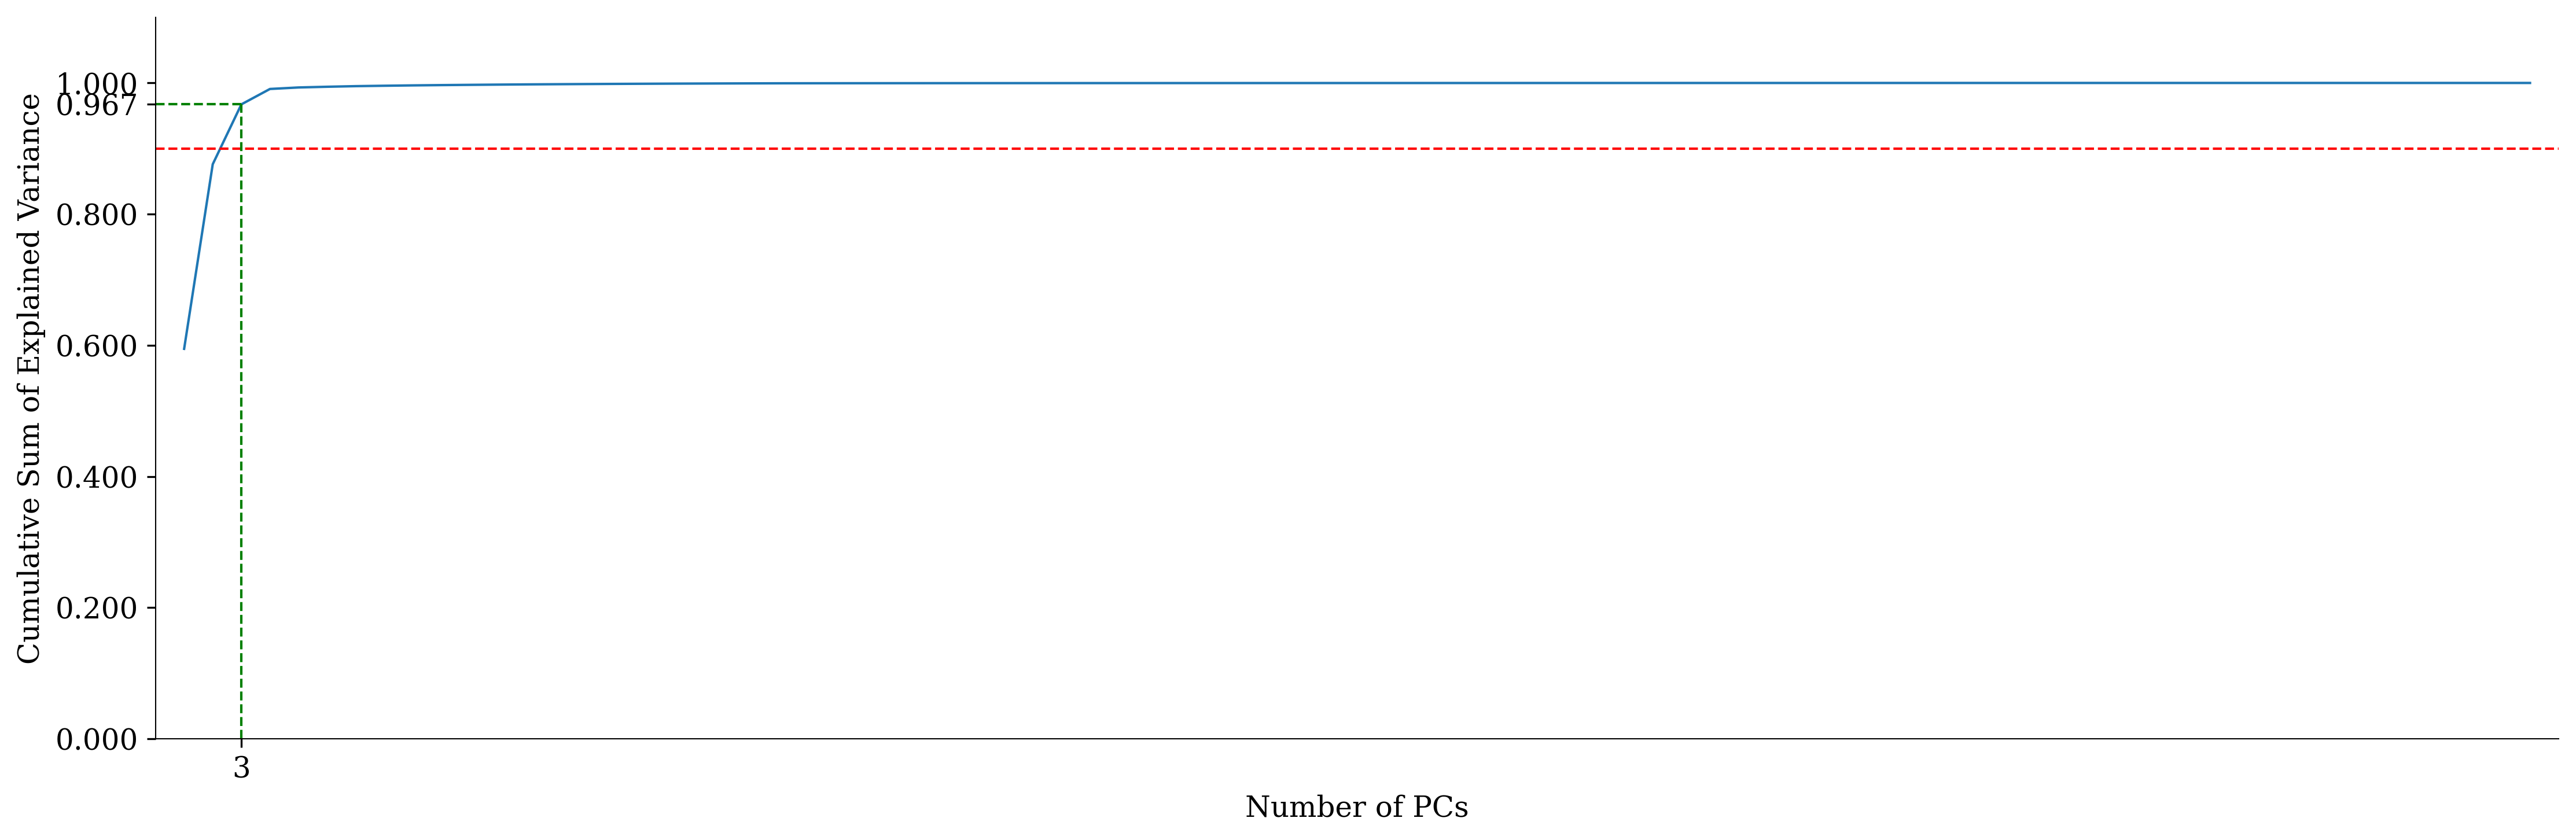

In [66]:
utils.PlotVarianceRatio(my_pca)

In [67]:
# Instantiate PCA
my_pca = PCA(n_components=0.9)

# Fit to scaled data
X_train_pca = my_pca.fit_transform(X_train_transformed)
X_validation_pca = my_pca.transform(X_validation_transformed)

In [68]:
logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train_pca, y_train)
logreg.score(X_validation_pca, y_validation)

0.1913991520290733

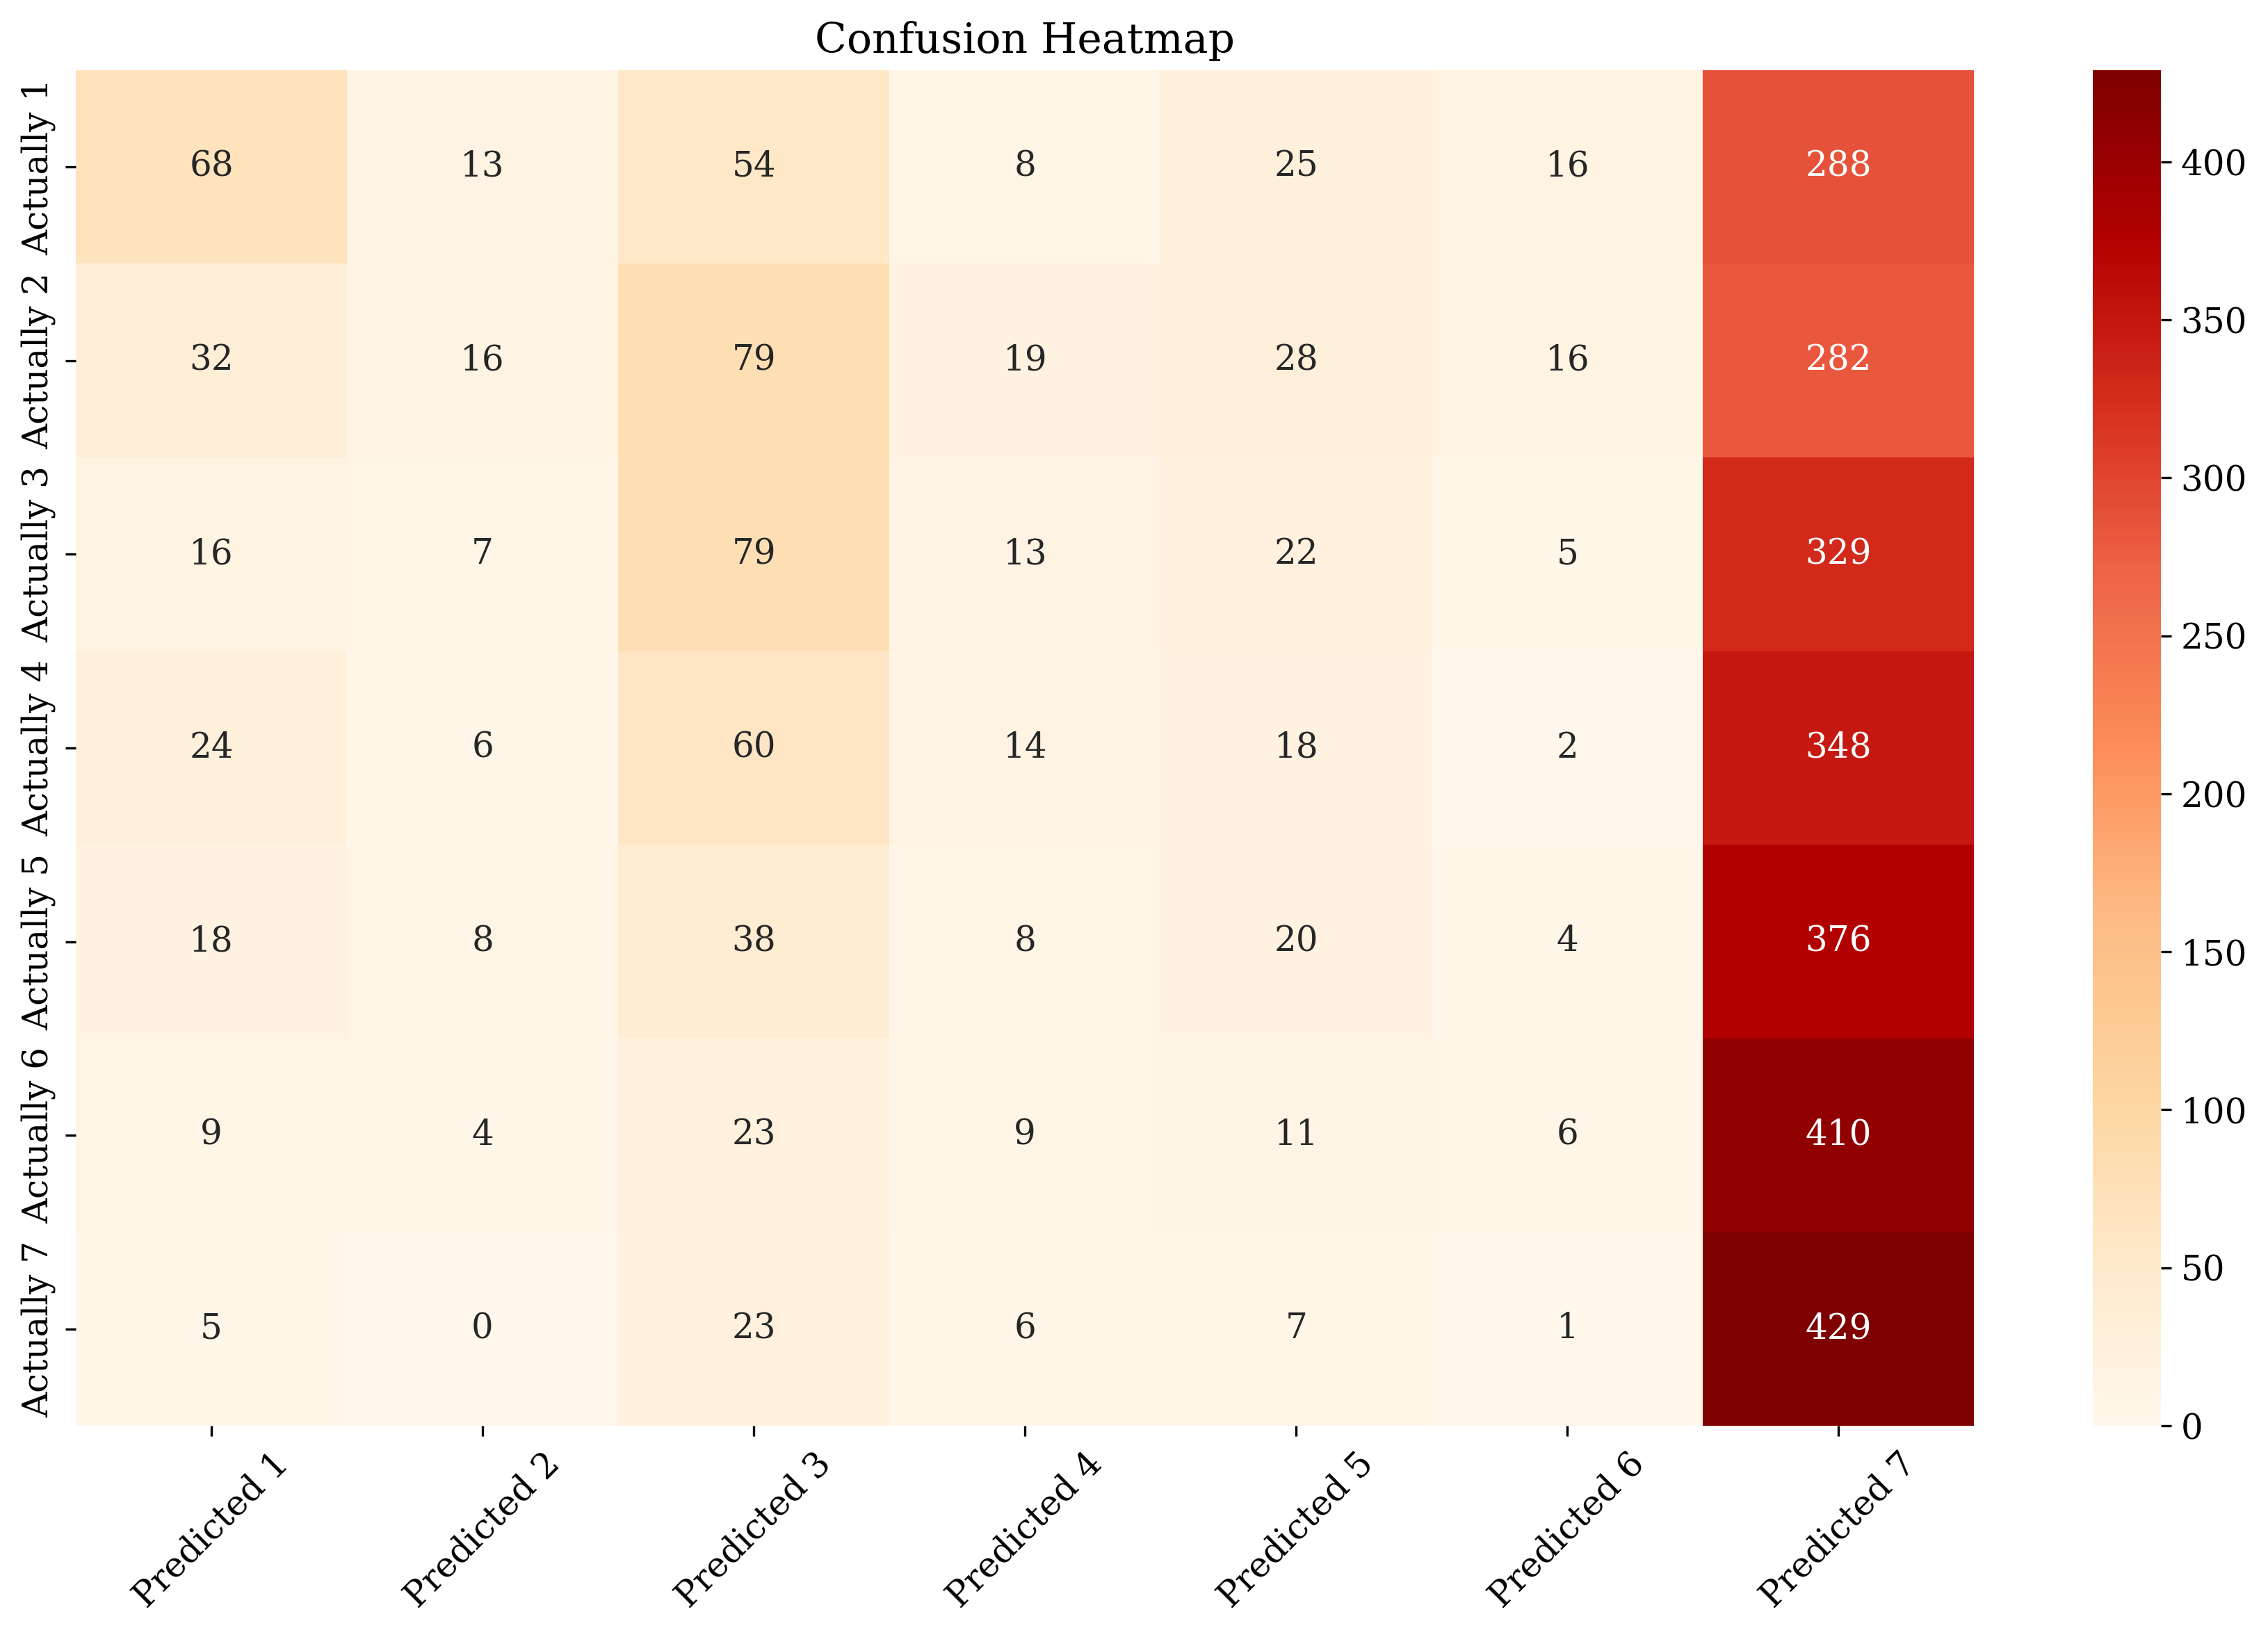

              precision    recall  f1-score   support

           A       0.40      0.14      0.21       472
           B       0.30      0.03      0.06       472
           C       0.22      0.17      0.19       471
           D       0.18      0.03      0.05       472
           E       0.15      0.04      0.07       472
           F       0.12      0.01      0.02       472
           G       0.17      0.91      0.29       471

    accuracy                           0.19      3302
   macro avg       0.22      0.19      0.13      3302
weighted avg       0.22      0.19      0.13      3302



In [69]:
model_utils.PlotConfusionMatrix(logreg, X_validation_pca, y_validation)

In [ ]:
model_utils.PlotBoundaries(logreg, X_validation_pca, y_validation)